In [1]:
#%load_ext autoreload
#%autoreload 2
%matplotlib inline

import os
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
#sys.path.insert(0,r'c:\Users\Niell Lab\Documents\GitHub\freely-moving-saccades-dev')
import saccadeAnalysis as sacc

import fmEphys as fme




Loading DLC 2.3.0...


##### Execute the cell below to compile free moving recordings into dataset that will be used for kmeans clustering

In [2]:
 recordings = fme.find('*fm1_ephys_props.h5', r'G:Shelby/dataset/')

rec_dict = {}
 for r in recordings:
     r_name = os.path.split(r)[1].split('_fm1')[0] 
     all_rs = fme.find('{}*ephys_props.h5'.format(r_name), r'G:Shelby/dataset')
     rec_dict[r_name] = all_rs

data = sacc.stack_dataset(rec_dict)

data = fme.replace_xr_obj(data)

 _savefile = 'G:Shelby/SC_data/SC_dataset_.h5' #must end in .h5
 fme.write_group_h5(data, _savefile)

Stacking dataset.
Adding session 022823_J637NC_control_Rig2.
Adding session 040623_J637LT_control_Rig2.
Adding session 040823_J630RT_control_Rig2.
Adding session 041923_J630LT_control_Rig2.
Adding session 051923_J644TT_control_Rig2.


In [3]:
fme.replace_xr_obj

<function fmEphys.utils.auxiliary.replace_xr_obj(df)>

In [3]:
data_path = 'T:/freely_moving_ephys/SC_analysis/SC_dataset.h5' #this needs to be changed if you change the savepath above
km_model = 'T:/freely_moving_ephys/SC_analysis/KMeans_PSTH_model_062022.pickle' #leave as is, based on V1 clusterin
pca_model = 'T:/freely_moving_ephys/SC_analysis/PCA_PSTH_model_062022.pickle' #leave as is, based on V1 clustering
savepath = 'T:/freely_moving_ephys/SC_analysis' #change if desired

##### The below code chunk will create a gui and ask for you to label the 4 clusters for SC those clusters are as follows: biphasic 1, late 2, early 3, negative 4, unresponsive 0

In [4]:
# Analyze dataset and apply clustering.
hffm, out ,= sacc.make_hffm_dataset(
    savepath=savepath,
    session_dict=None,
    hffm_path=data_path,
    km_model=km_model,
    pca_model=pca_model
)

# when a python dialog box opens, open the file "KMEANS_RESULTS.png" written to the savepath,
# and enter the appropriate clustering labels according to that .png figure.


Reading HfFm dataset.


In [5]:
hffm

FmLt_Amplitude  FmLt_ContamPct FmLt_KSLabel    FmLt_amp  FmLt_ch  \
0             851.2             0.0         good   71.599586        0   
1            1976.0             0.0         good  141.501617        1   
2            2688.1             0.1         good  117.943451        6   
3            2363.1             0.3         good  147.074677        7   
4            1520.4             9.1         good  109.078133       10   
..              ...             ...          ...         ...      ...   
166          2042.3             4.8         good  127.881409      109   
167          1504.9            10.5          mua  117.080582      109   
168          1724.2             0.0         good  127.468079      115   
169          2037.6             0.0         good  134.619919      117   
170          1229.1             8.6         good  101.171638      126   

     FmLt_depth    FmLt_fr FmLt_group  FmLt_n_spikes  FmLt_sh  ... Gt_dsi_low  \
0           775   0.182439       good            973        0  ...        NaN   
1           750   1.731580       good           9235        0  ...        NaN   
2           625   9.645096       good          51440        0  ...        NaN   
3           600   3.709162       good          19782        0  ...        NaN   
4           525   5.892246       good          31425        0  ...   1.000000   
..          ...        ...        ...            ...      ...  ...        ...   
166         450   4.344908       good          21947        0  ...   1.000000   
167         450   4.465078       good          22554        0  ...   0.043219   
168         300   0.321310       good           1623        0  ...   1.000000   
169         250   0.085920       good            434        0  ...        NaN   
170          25  12.110390       good          61172        0  ...   1.000000   

    Gt_dsi_mid  Gt_dsi_high osi_for_sf_pref dsi_for_sf_pref Gt_evoked_rate  \
0     0.660534          NaN             NaN             NaN      -0.214507   
1     1.000000     1.000000             NaN             NaN      -5.928901   
2          NaN          NaN             NaN             NaN      -9.100493   
3          NaN     1.000000             NaN             NaN      -8.479783   
4     1.000000     0.657375        0.112486        1.000000      -4.766705   
..         ...          ...             ...             ...            ...   
166   0.287851     1.000000        0.191984        0.287851       2.326242   
167   0.022614     0.215982        0.153010        0.022614       1.066543   
168   0.202650     0.140149        1.000000        0.202650       0.012779   
169   1.000000     1.000000             NaN             NaN      -0.006469   
170   1.000000     0.280935        0.484994        0.280935     -18.268107   

      tf_pref tf_pref_cps sf_pref_cpd grat_speed_dps  
0    1.158081    2.948486    0.020000     147.424322  
1    1.000000    2.000000         NaN            NaN  
2         NaN         NaN         NaN            NaN  
3    1.000000    2.000000         NaN            NaN  
4    1.486544    4.919267    0.020996     234.292275  
..        ...         ...         ...            ...  
166  1.192084    3.152505    0.080000      39.406312  
167  1.149189    2.895132    0.083512      34.667080  
168  1.159127    2.954764    0.081998      36.034452  
169  1.000000    2.000000         NaN            NaN  
170  1.071309    2.427855    0.320000       7.587046  

[171 rows x 347 columns]

In [ ]:
hffm['']

(0.0, 0.7)

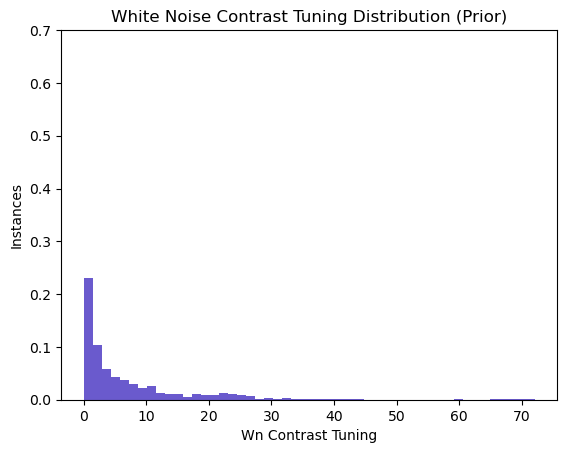

In [53]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm 
import statistics
%matplotlib inline

x = np.concatenate(hffm['Wn_contrast_tuning'].to_numpy())
x = x[~np.isnan(x)]

plt.hist(x, density=True, color ='slateblue', bins=50)  # density=False would make counts
plt.title('White Noise Contrast Tuning Distribution (Prior)')
plt.ylabel('Instances')
plt.xlabel('Wn Contrast Tuning')
plt.ylim(0,0.7)

In [12]:
len(hffm['FmLt_gazeshift_leftT'].iloc[0])


72

In [16]:
len(hffm['FmLt_gazeshift_rightT'].iloc[0]) + len(hffm['FmLt_gazeshift_leftT'].iloc[0])

395

In [17]:
len(hffm['FmLt_compensatory_rightT'].iloc[0]) + len(hffm['FmLt_compensatory_leftT'].iloc[0])

1344

In [15]:
(len(hffm['FmLt_gazeshift_rightT'].iloc[0]) + len(hffm['FmLt_gazeshift_leftT'].iloc[0]))/(len(hffm['FmLt_gazeshift_leftT'].iloc[0])+ len(hffm['FmLt_gazeshift_rightT'].iloc[0]) + len(hffm['FmLt_compensatory_leftT'].iloc[0]) + len(hffm['FmLt_compensatory_rightT'].iloc[0]))

0.22714203565267396

In [249]:
hffm[''] #hffm is the main dataset, you can index into it to get cluster specific responses by using [out]

[{'Rc_temseq': array([[-0.34642666, -0.34614608, -0.34665013, ..., -0.12460348,
          -0.13205573, -0.14134698],
         [-0.15451122, -0.13911717, -0.12447543, ..., -0.10137421,
          -0.09577625, -0.09027994],
         [ 0.15265803,  0.14620065,  0.13850666, ..., -0.04533286,
          -0.05287274, -0.06088272],
         ...,
         [-0.16789101, -0.16100171, -0.15430138, ...,  0.02615943,
           0.01627272,  0.0048728 ],
         [-0.06078525, -0.05559339, -0.05172855, ...,  0.01596399,
           0.00651495, -0.00378191],
         [-0.07389874, -0.07781997, -0.08207236, ..., -0.08690062,
          -0.08263851, -0.0782577 ]]),
  'Sn_temseq': array([[-0.0458104 , -0.03812631, -0.0329574 , ..., -0.04856627,
          -0.05592023, -0.06539135],
         [ 0.03529473,  0.04319279,  0.04960232, ...,  0.02655757,
           0.0200844 ,  0.01228863],
         [-0.02003579, -0.01103222, -0.00423617, ..., -0.07501604,
          -0.08486317, -0.09614881],
         ...,
        

In [54]:
comp_temp_seq = out['Fm_comp_temseq']

In [173]:
lat_order =np.argsort(out['Fm_latency_unsort']) #variable created to save out unsorted latencys in ascending order

In [252]:
temporal_sequence = out['Fm_pref_temseq'] #variable for preferred temp sequence of resp cells in dataset

In [174]:
temp_unsort = out['Fm_pref_temseq_unsort'] #variable for preferred temp sequences of unsorted data

In [244]:
temporal_sequence_nonpref = out['Fm_nonpref_temseq'] #non preferred temp sequences of resp cells
temp_seq_nonpref_unsort = out['Fm_nonpref_temseq_unsort'] #non preferred temp sequences of all cells

In [210]:
latency_resp = out['Fm_latency_unsort'][resp] #latency of responsive cells

In [213]:
sorted_resp = resp[np.argsort(latency_resp)] #indices of responses cells sorted by ascending latency

In [227]:
latency_nonresp = out['Fm_latency_unsort'][nonresp] #latency of cells nonresponsive to gazeshifts 

In [230]:
sorted_nonresp = nonresp[np.argsort(latency_nonresp)] #indices of cells nonresponsive to gaze shifts sorted by ascending latency

In [232]:
sorted_all = np.append(sorted_resp, sorted_nonresp) #indices of all of the cells in the dataset by ascending latency

#### Temporal sequence plots

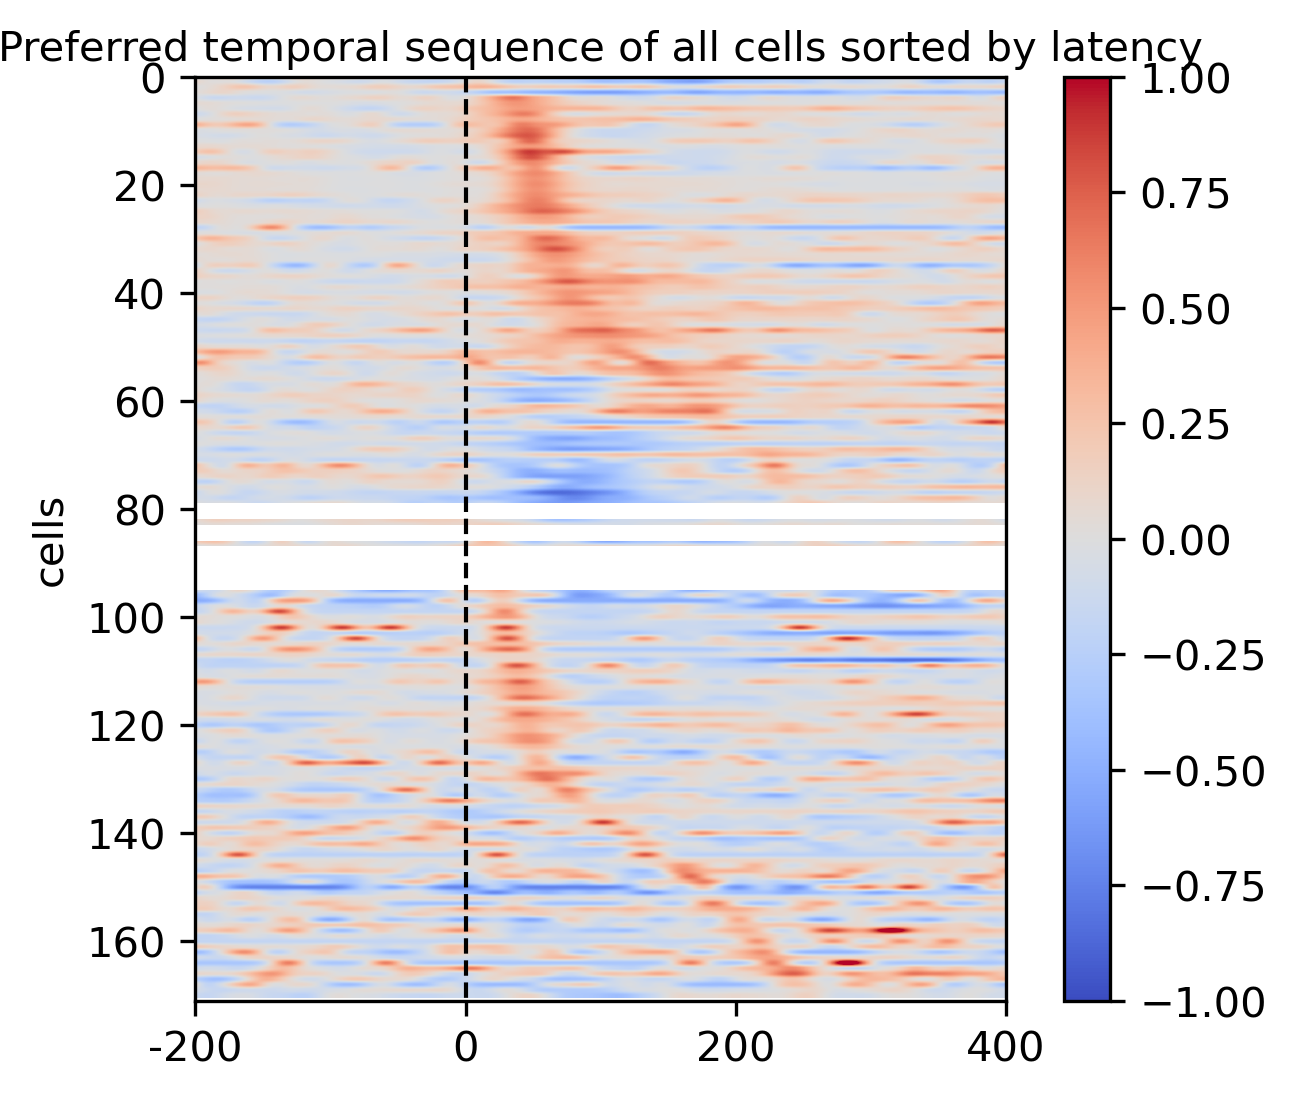

In [255]:
#plt of preferred temporal frequencies including cells that are unresponsive to gazeshifts
fig, ax = plt.subplots(1,1, figsize=(5,4), dpi=300)
_im = sacc.plot_PSTH_heatmap(ax, temp_unsort[sorted_all,:], cscale=1)
ax.set_aspect(4.)
plt.colorbar(ax=ax, mappable=_im)
plt.xlabel("Preferred temporal sequence of all cells sorted by latency")
ax.xaxis.set_label_position("top")

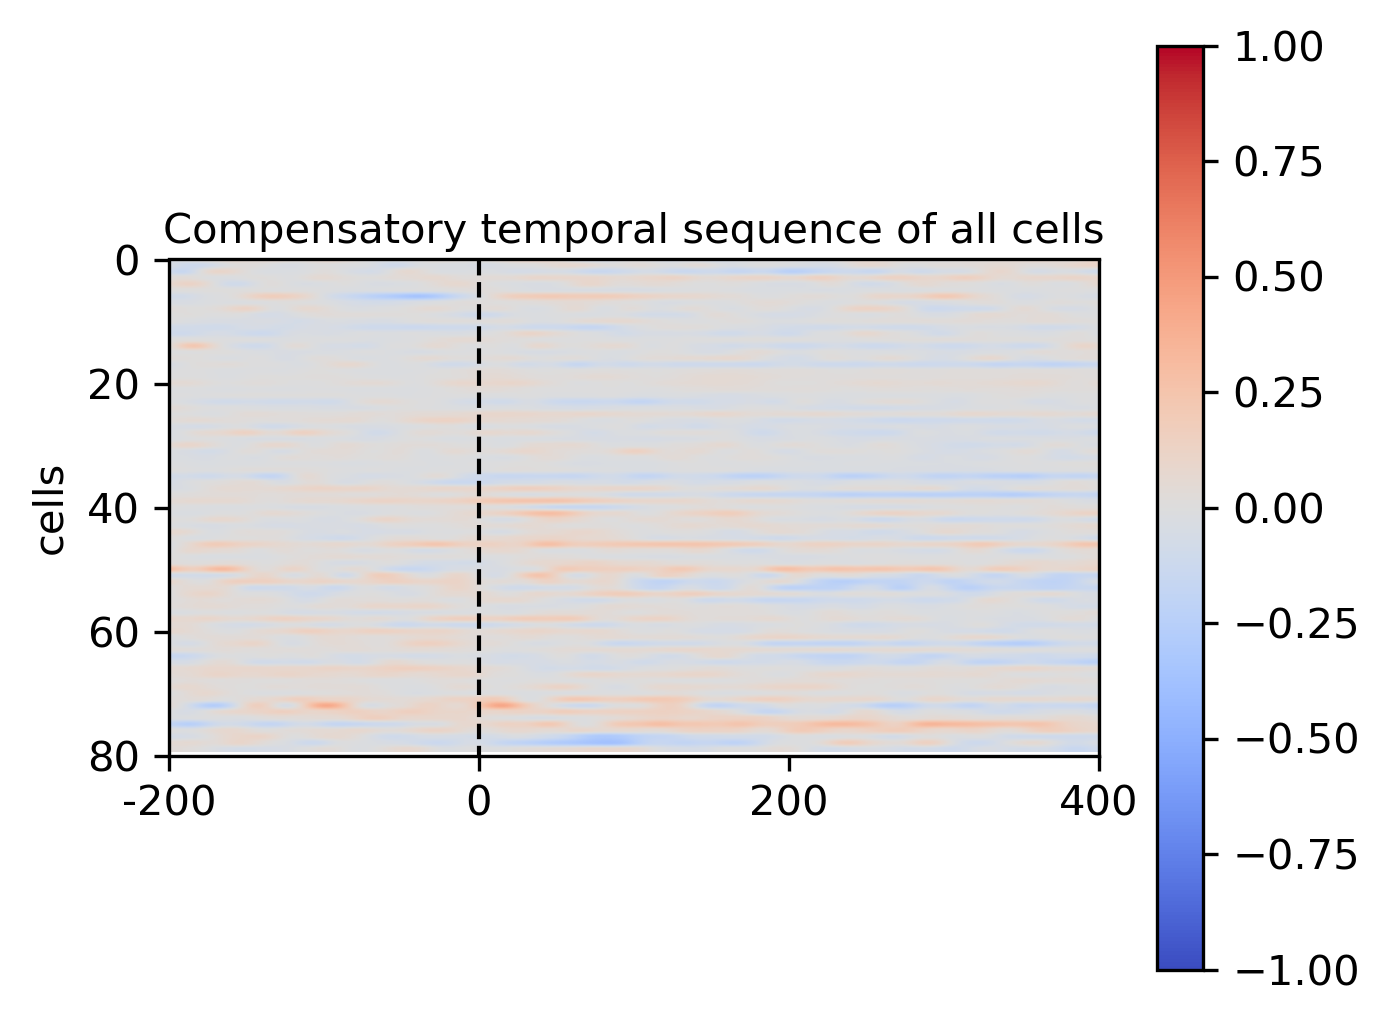

In [56]:
#plt of preferred temporal frequencies including cells that are unresponsive to gazeshifts
fig, ax = plt.subplots(1,1, figsize=(5,4), dpi=300)
_im = sacc.plot_PSTH_heatmap(ax, comp_temp_seq, cscale=1)
ax.set_aspect(4.)
plt.colorbar(ax=ax, mappable=_im)
plt.xlabel("Compensatory temporal sequence of all cells")
ax.xaxis.set_label_position("top")

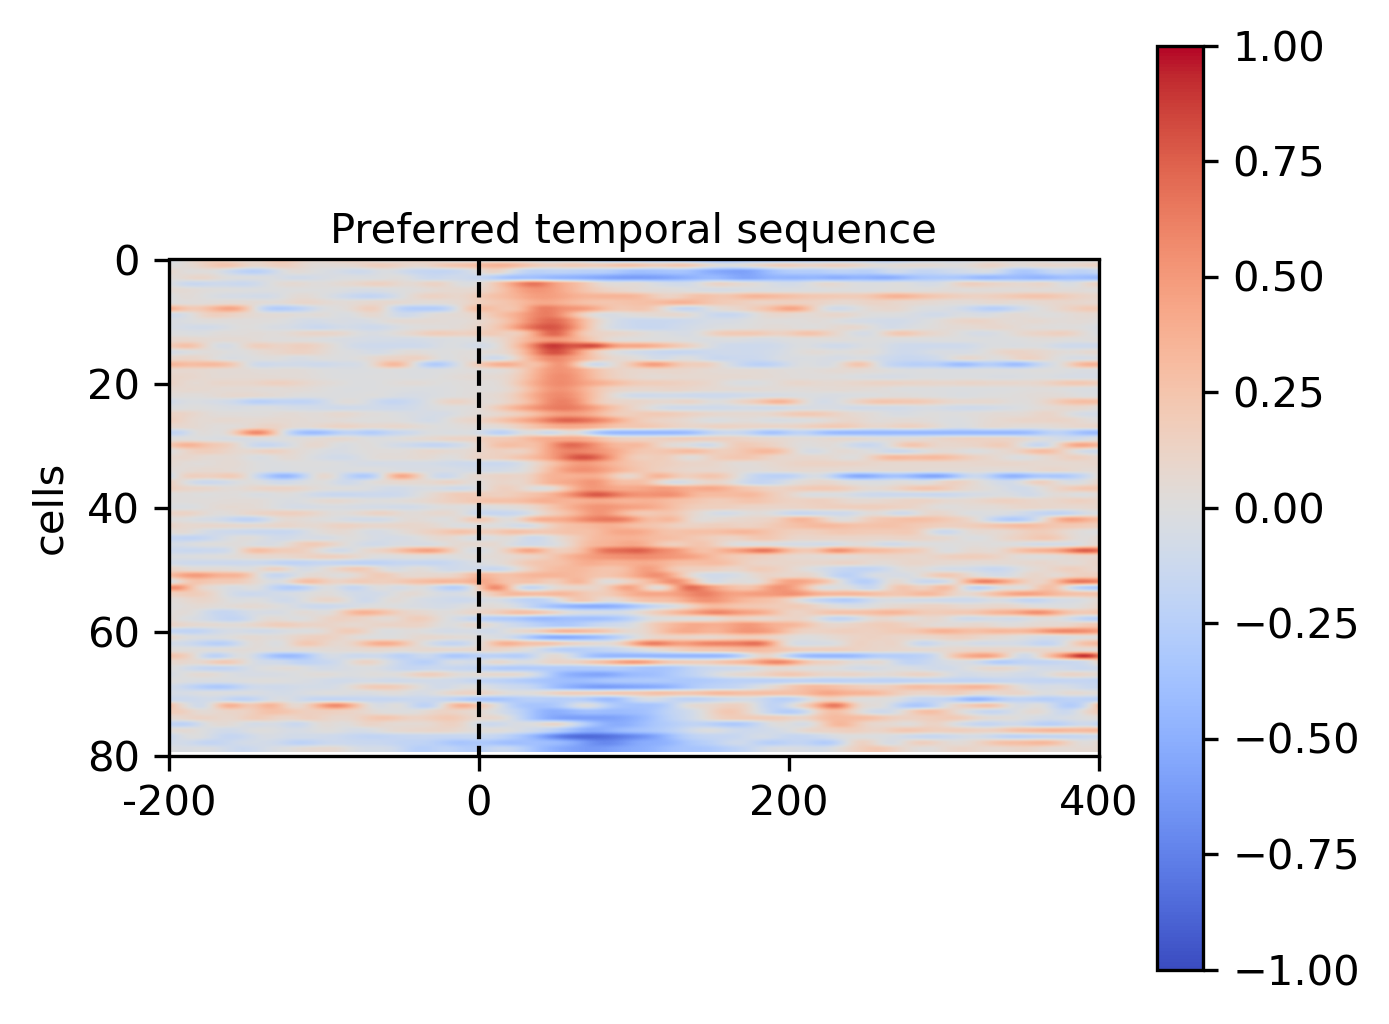

In [12]:
#preferred temp sequence response of cells responsive to gazeshifts
fig, ax = plt.subplots(1,1, figsize=(5,4), dpi=300)
_im = sacc.plot_PSTH_heatmap(ax, temporal_sequence, cscale=1)
ax.set_aspect(4.)
plt.colorbar(ax=ax, mappable=_im)
plt.xlabel("Preferred temporal sequence")
ax.xaxis.set_label_position("top")


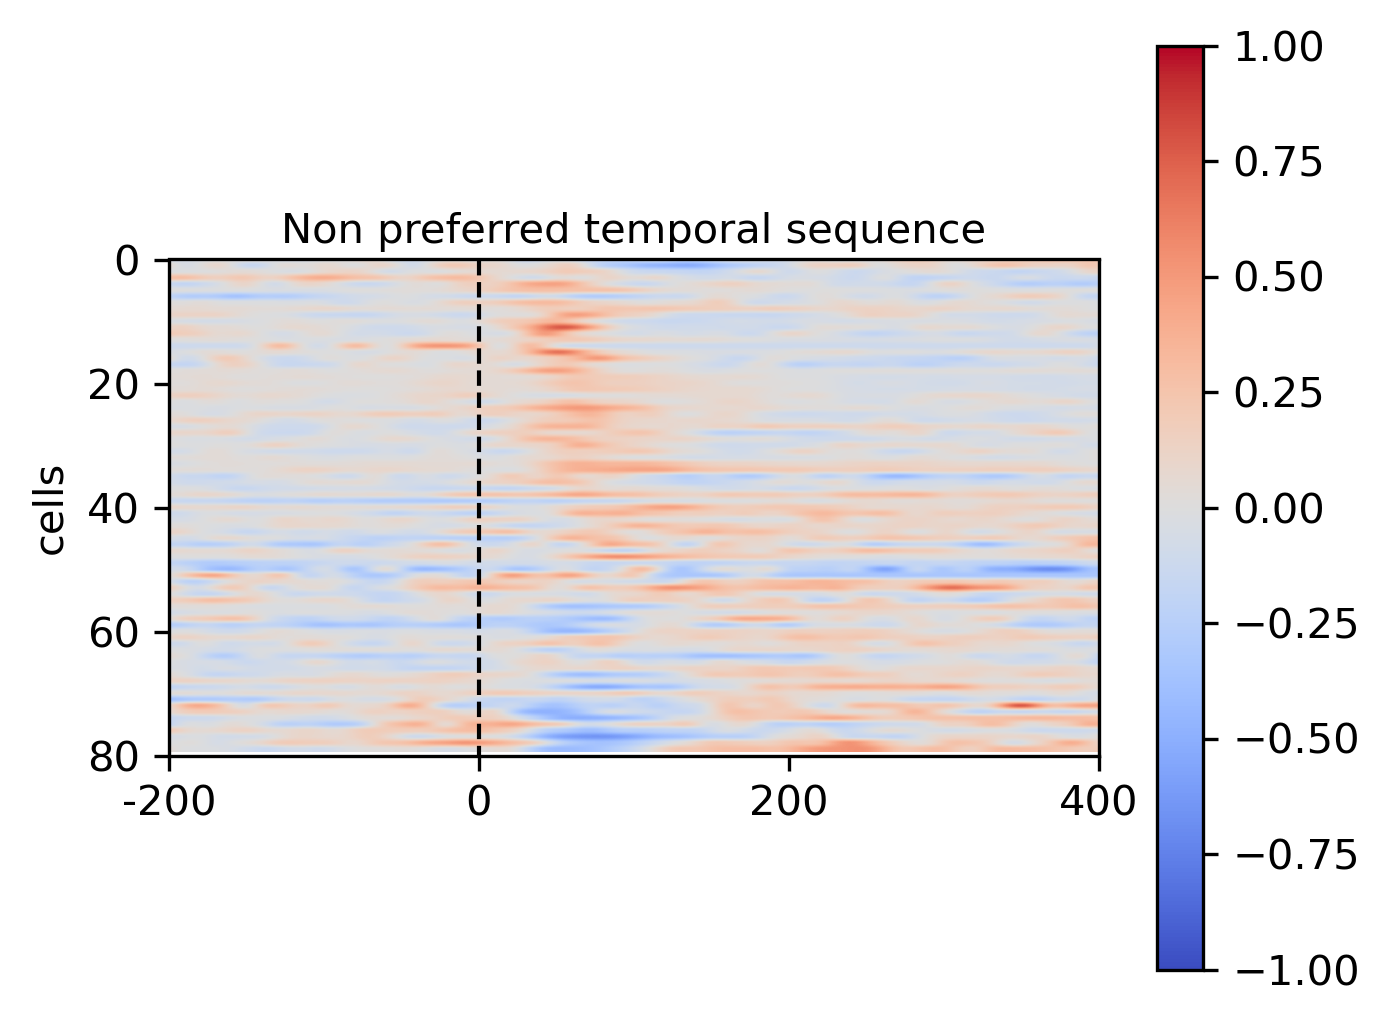

In [245]:
#nonpreferred temp sequence response of cells responsive to gazeshifts
fig, ax = plt.subplots(1,1, figsize=(5,4), dpi=300)
_im = sacc.plot_PSTH_heatmap(ax, temp_seq_nonpref_unsort[sorted_resp,:], cscale=1)
ax.set_aspect(4.)
plt.colorbar(ax=ax, mappable=_im)
plt.xlabel("Non preferred temporal sequence")

ax.xaxis.set_label_position("top")

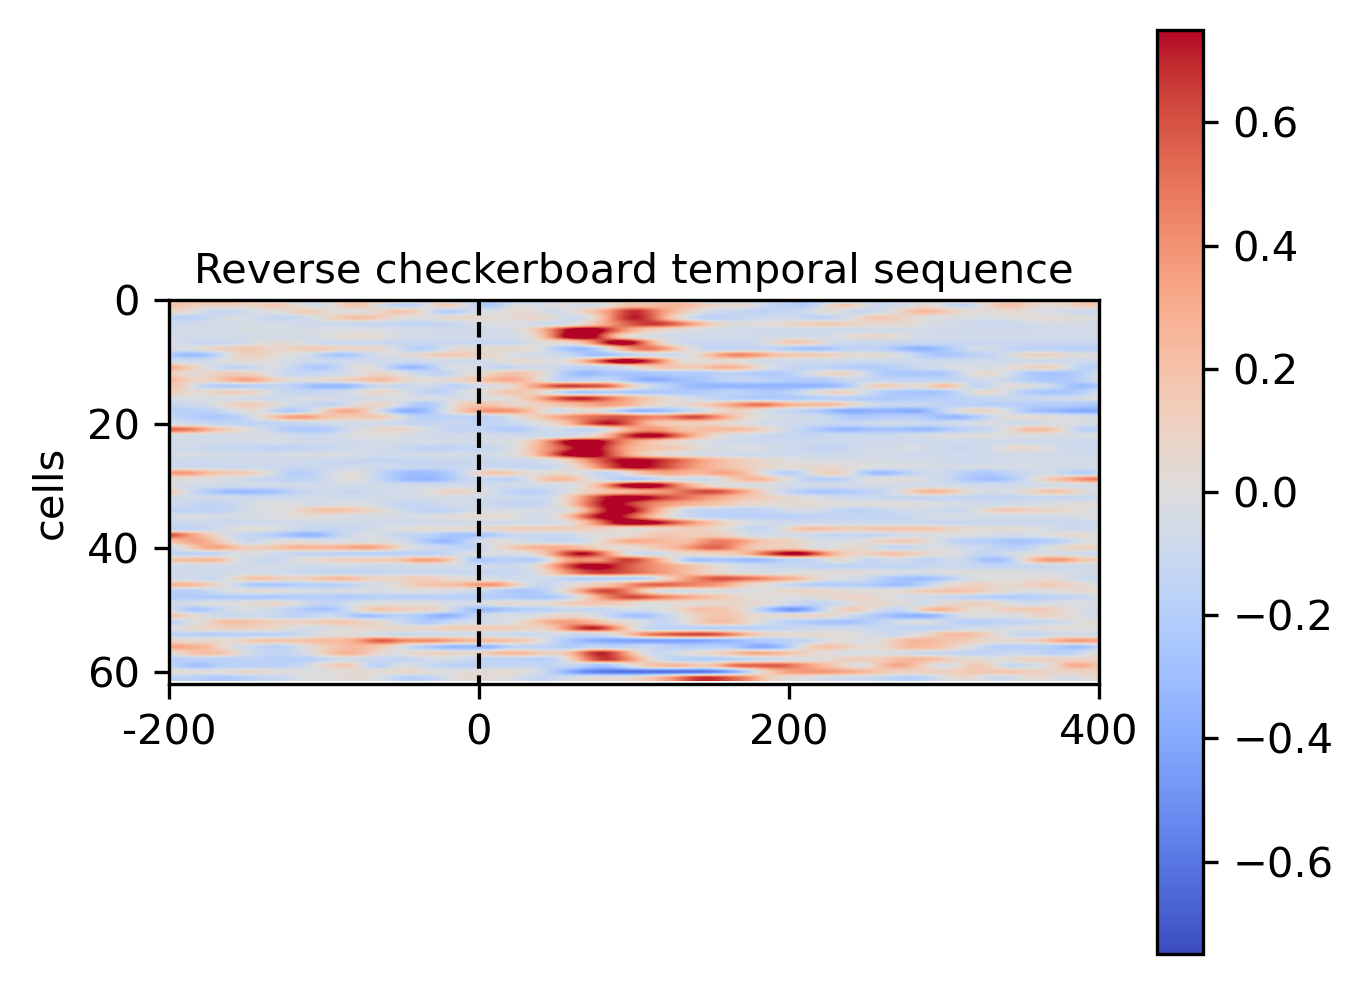

In [260]:
#plt reverse checkerboard temp sequence of gazeshift responsive cells
fig, ax = plt.subplots(1,1, figsize=(5,4), dpi=300)
_im = sacc.plot_PSTH_heatmap(ax, revcheck, cscale=0.75)
ax.set_aspect(4.)

plt.colorbar(ax=ax, mappable=_im)
plt.xlabel("Reverse checkerboard temporal sequence")
ax.xaxis.set_label_position("top")

In [ ]:
ou

In [261]:
revcheckall = out['Rc_temseq_unsort'] #variable for all responses to rc tempseq

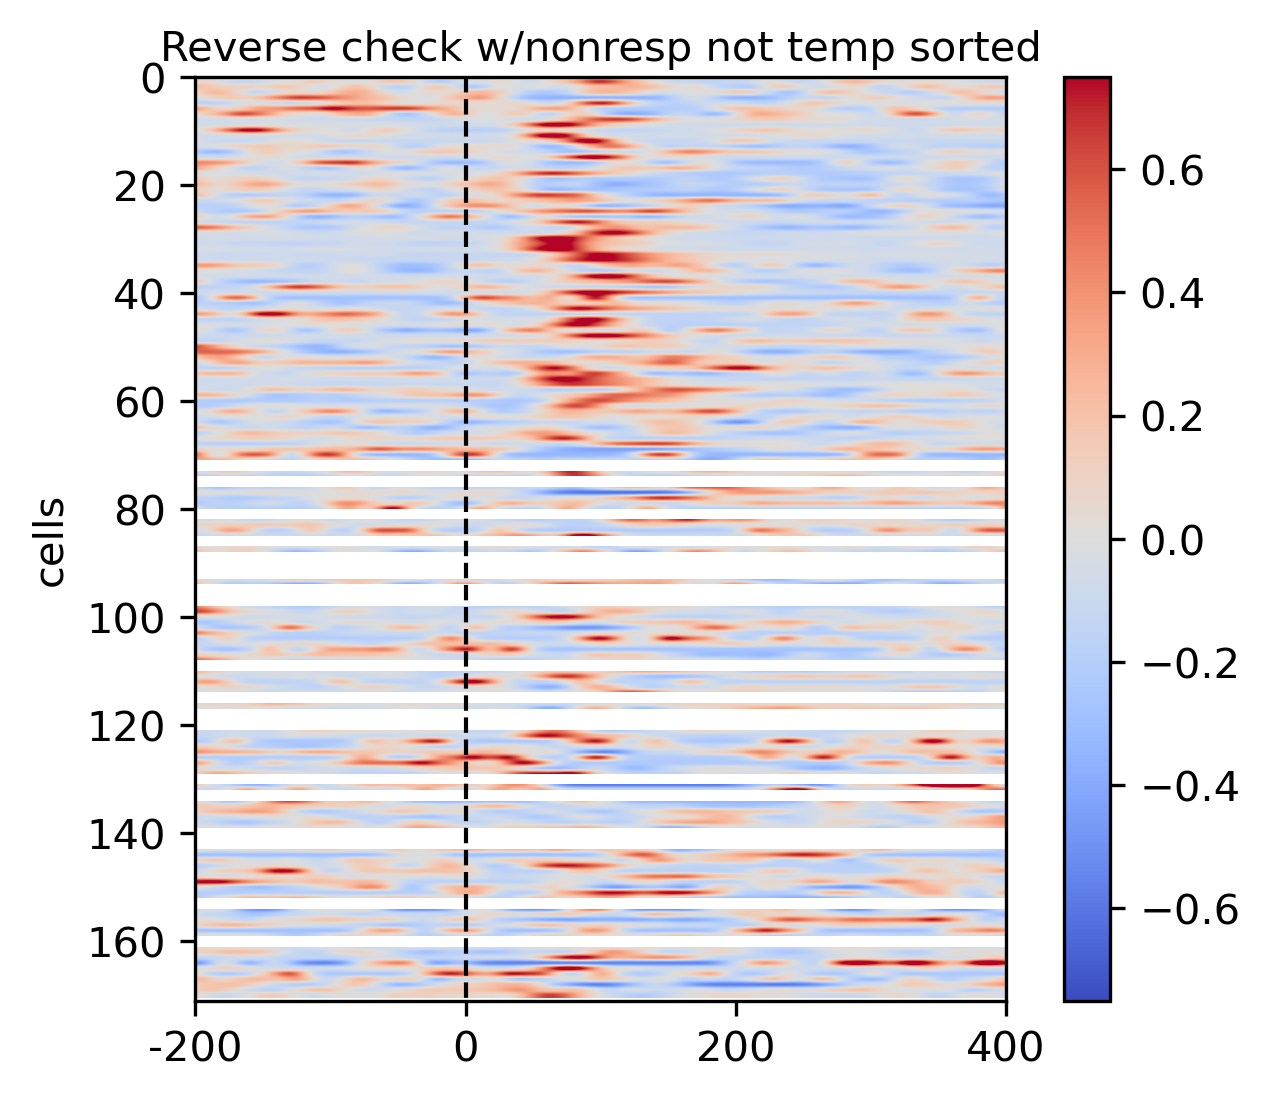

In [262]:
#plt of all cell responses to gazeshifts and rc stimulus 
fig, ax = plt.subplots(1,1, figsize=(5,4), dpi=300)
_im = sacc.plot_PSTH_heatmap(ax, revcheckall[sorted_all,:], cscale=0.75)
ax.set_aspect(4.)

plt.colorbar(ax=ax, mappable=_im)
plt.xlabel("Reverse check w/nonresp not temp sorted")
ax.xaxis.set_label_position("top")

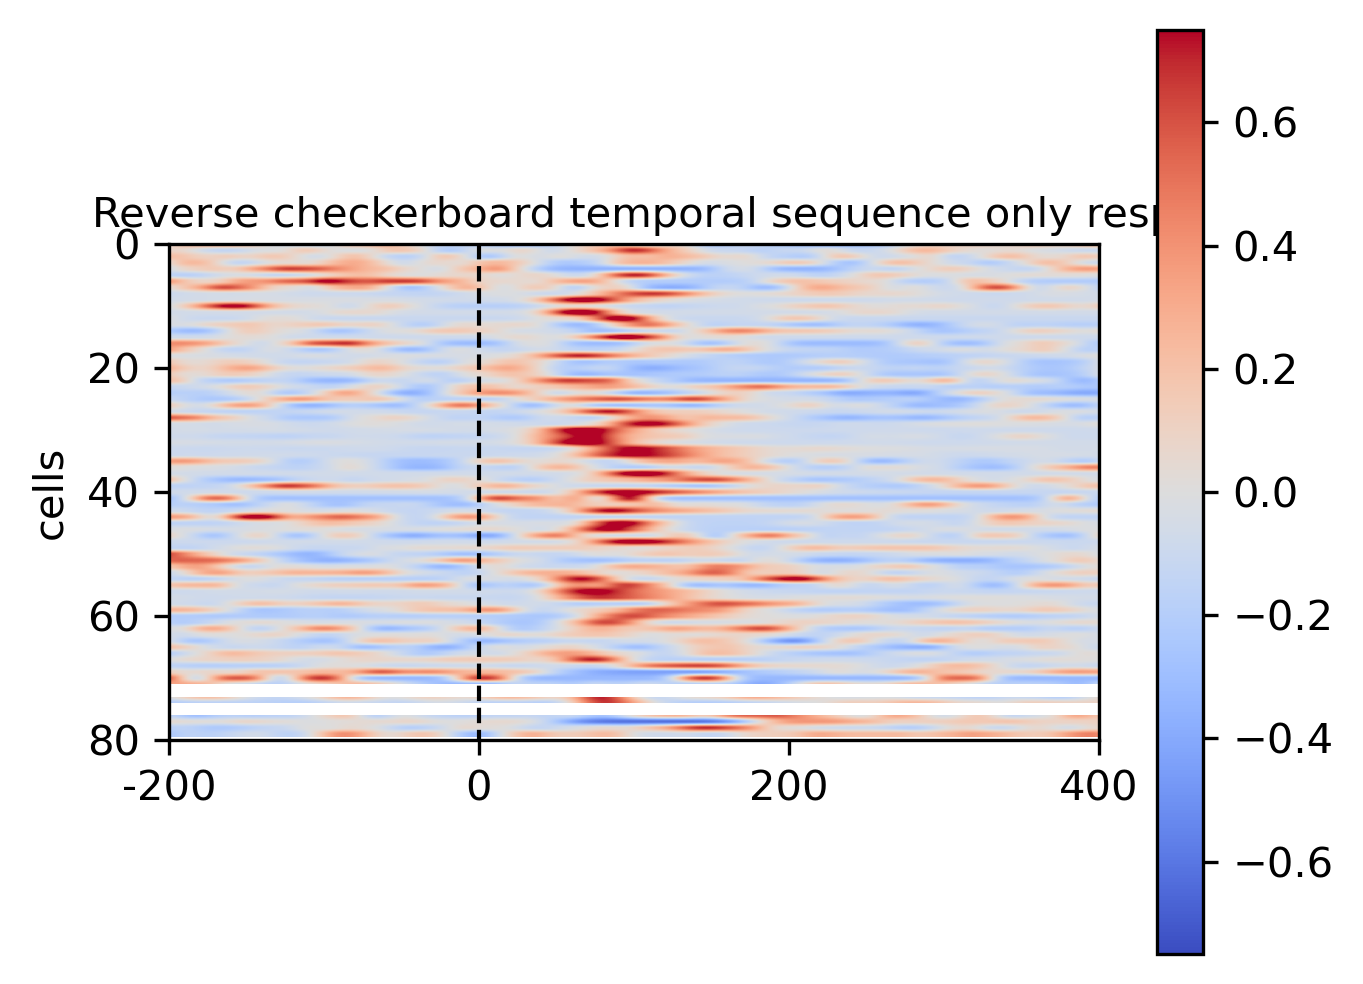

In [266]:
#plt of resp cells sorted by there response to gazeshift
fig, ax = plt.subplots(1,1, figsize=(5,4), dpi=300)
_im = sacc.plot_PSTH_heatmap(ax, revcheckall[sorted_resp,:], cscale=0.75)
ax.set_aspect(4.)

plt.colorbar(ax=ax, mappable=_im)
plt.xlabel("Reverse checkerboard temporal sequence only resp")
ax.xaxis.set_label_position("top")

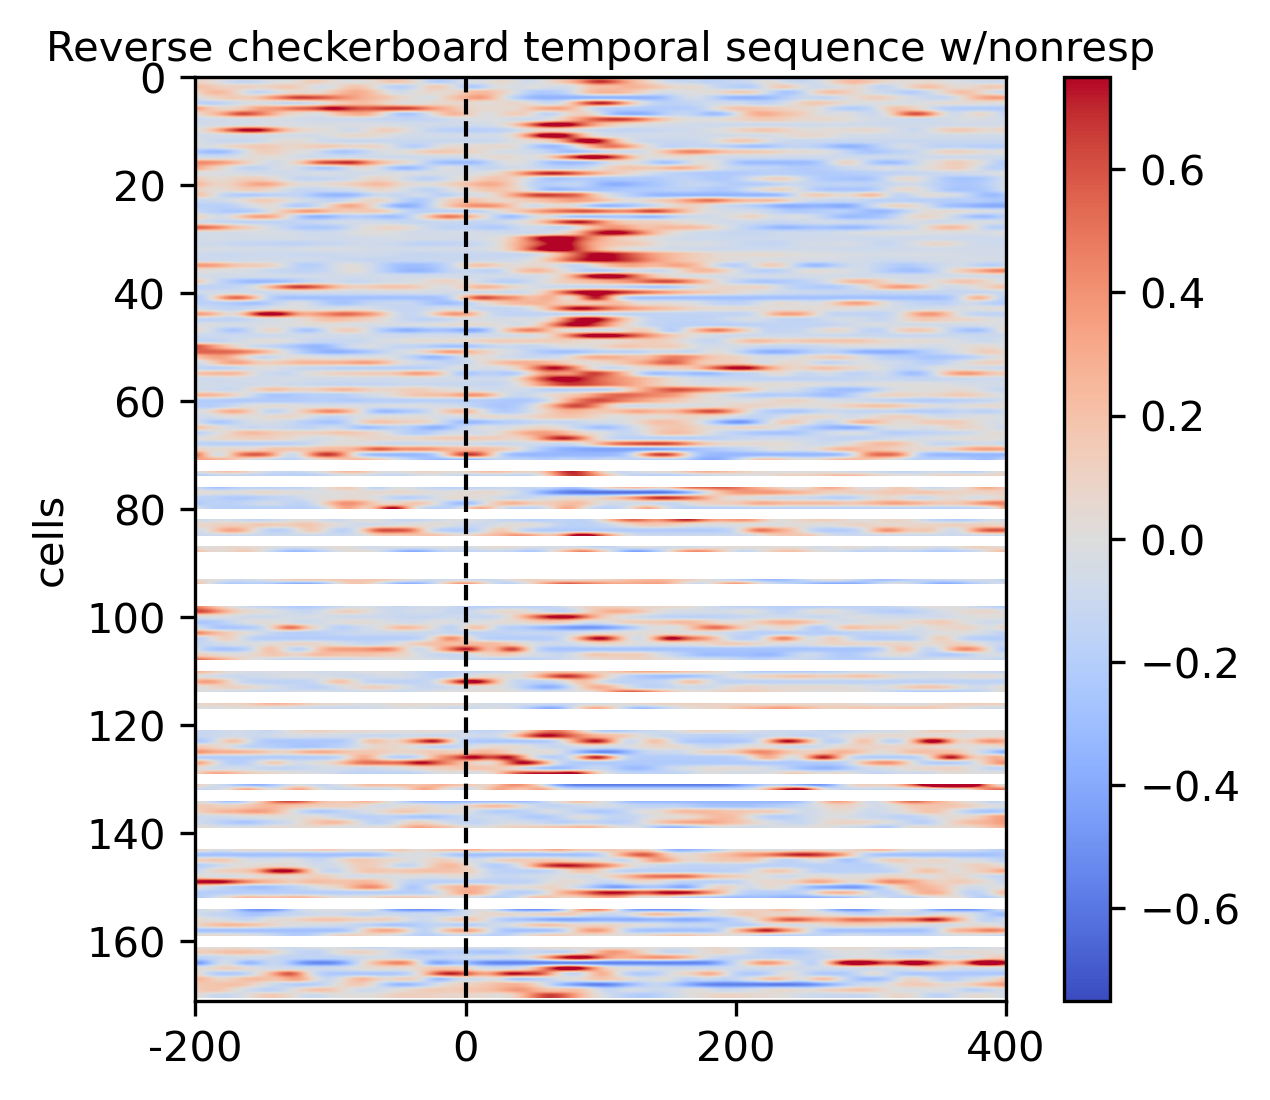

In [264]:
#plt of all cell responses to rc sorted by latency 
fig, ax = plt.subplots(1,1, figsize=(5,4), dpi=300)
_im = sacc.plot_PSTH_heatmap(ax, revcheckall[sorted_all,:], cscale=0.75)
ax.set_aspect(4.)

plt.colorbar(ax=ax, mappable=_im)
plt.xlabel("Reverse checkerboard temporal sequence w/nonresp")
ax.xaxis.set_label_position("top")

In [ ]:
sparsenoise = out['Sn_temseq'] #sparsenoise temp seq response of cells resp to stim & gazeshift

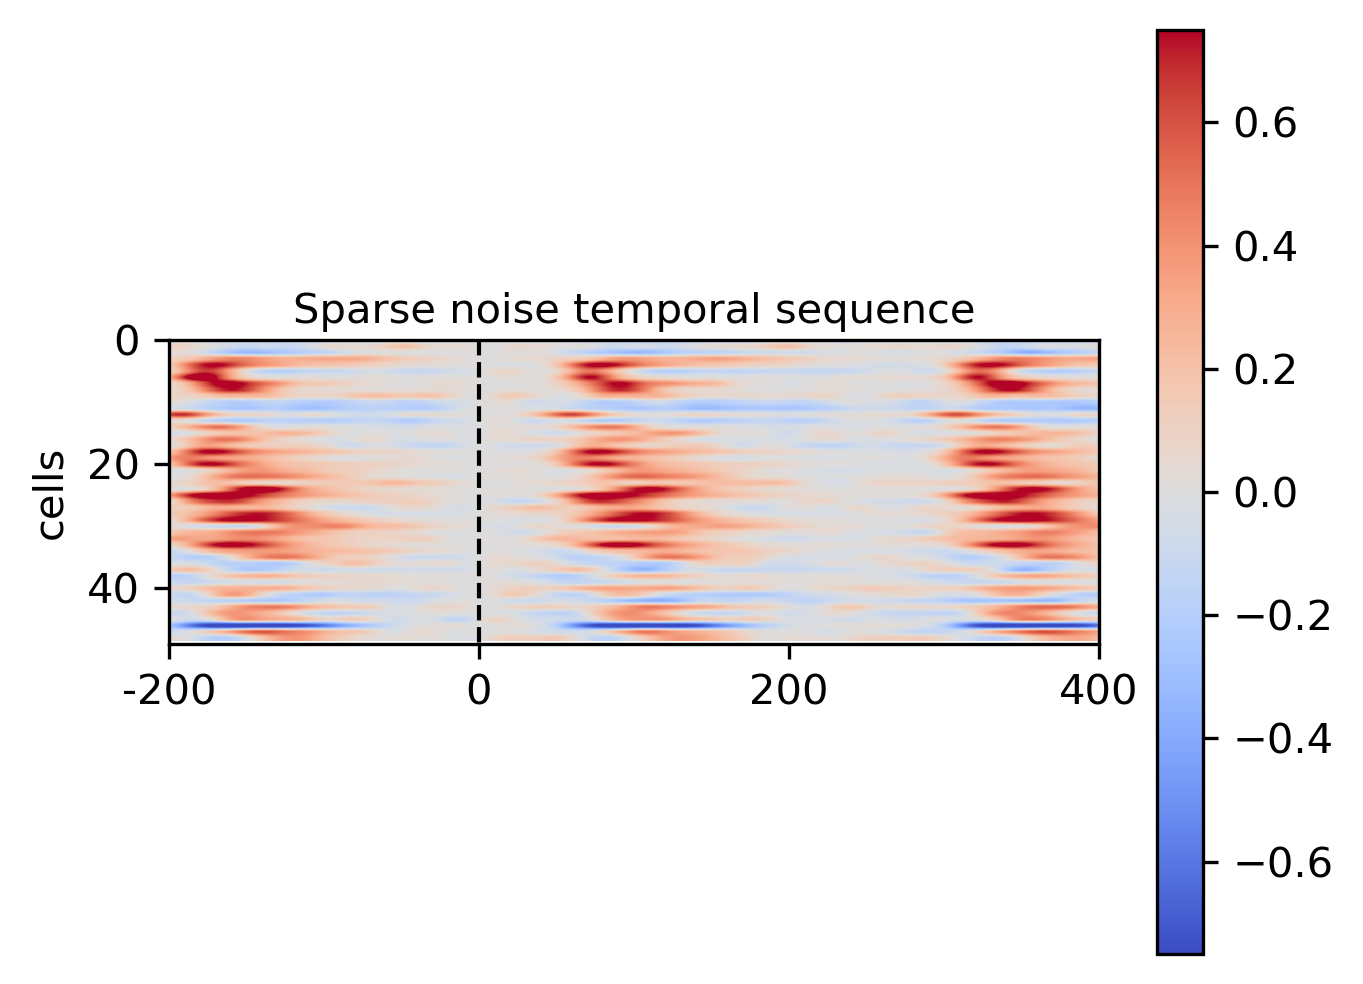

In [330]:
#plt of sparsenoise temp seq from cells responsive to gazeshift and sn stim
fig, ax = plt.subplots(1,1, figsize=(5,4), dpi=300)
_im = sacc.plot_PSTH_heatmap(ax, sparsenoise, cscale=0.75)
ax.set_aspect(4.)

plt.colorbar(ax=ax, mappable=_im)
plt.xlabel("Sparse noise temporal sequence")
ax.xaxis.set_label_position("top")

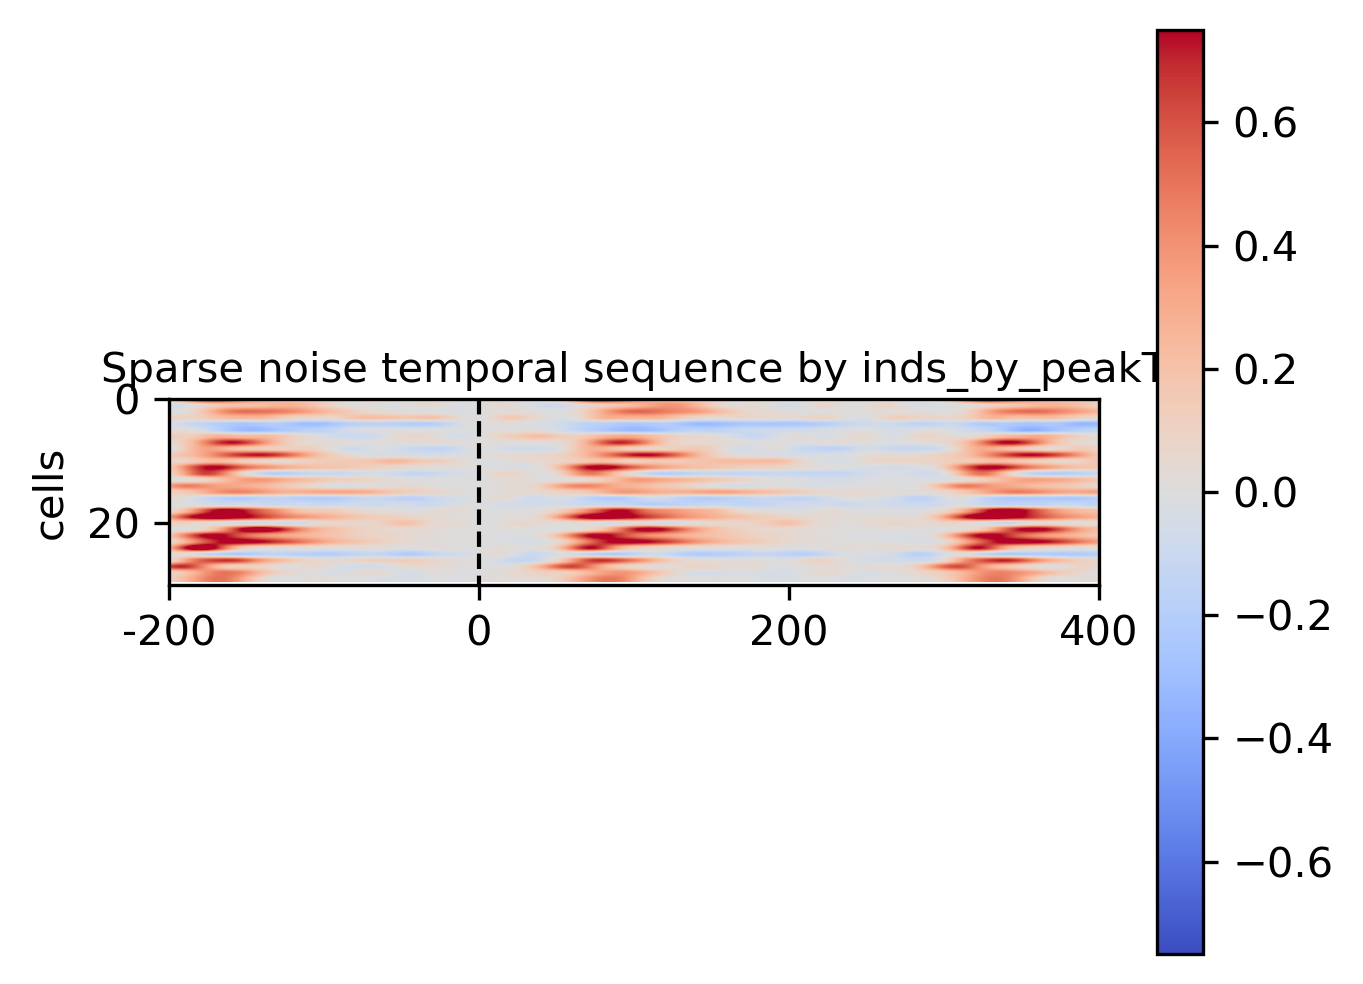

In [269]:
#plt of sparsenoise sorted by indices of peak T
fig, ax = plt.subplots(1,1, figsize=(5,4), dpi=300)
_im = sacc.plot_PSTH_heatmap(ax, sparsenoise[inds_by_peakT,:], cscale=0.75)
ax.set_aspect(4.)

plt.colorbar(ax=ax, mappable=_im)
plt.xlabel("Sparse noise temporal sequence by inds_by_peakT")
ax.xaxis.set_label_position("top")

In [270]:
sparsenoiseall = out['Sn_temseq_unsort'] #sparsenoise response of all cells including ones not responsive to gazeshifts

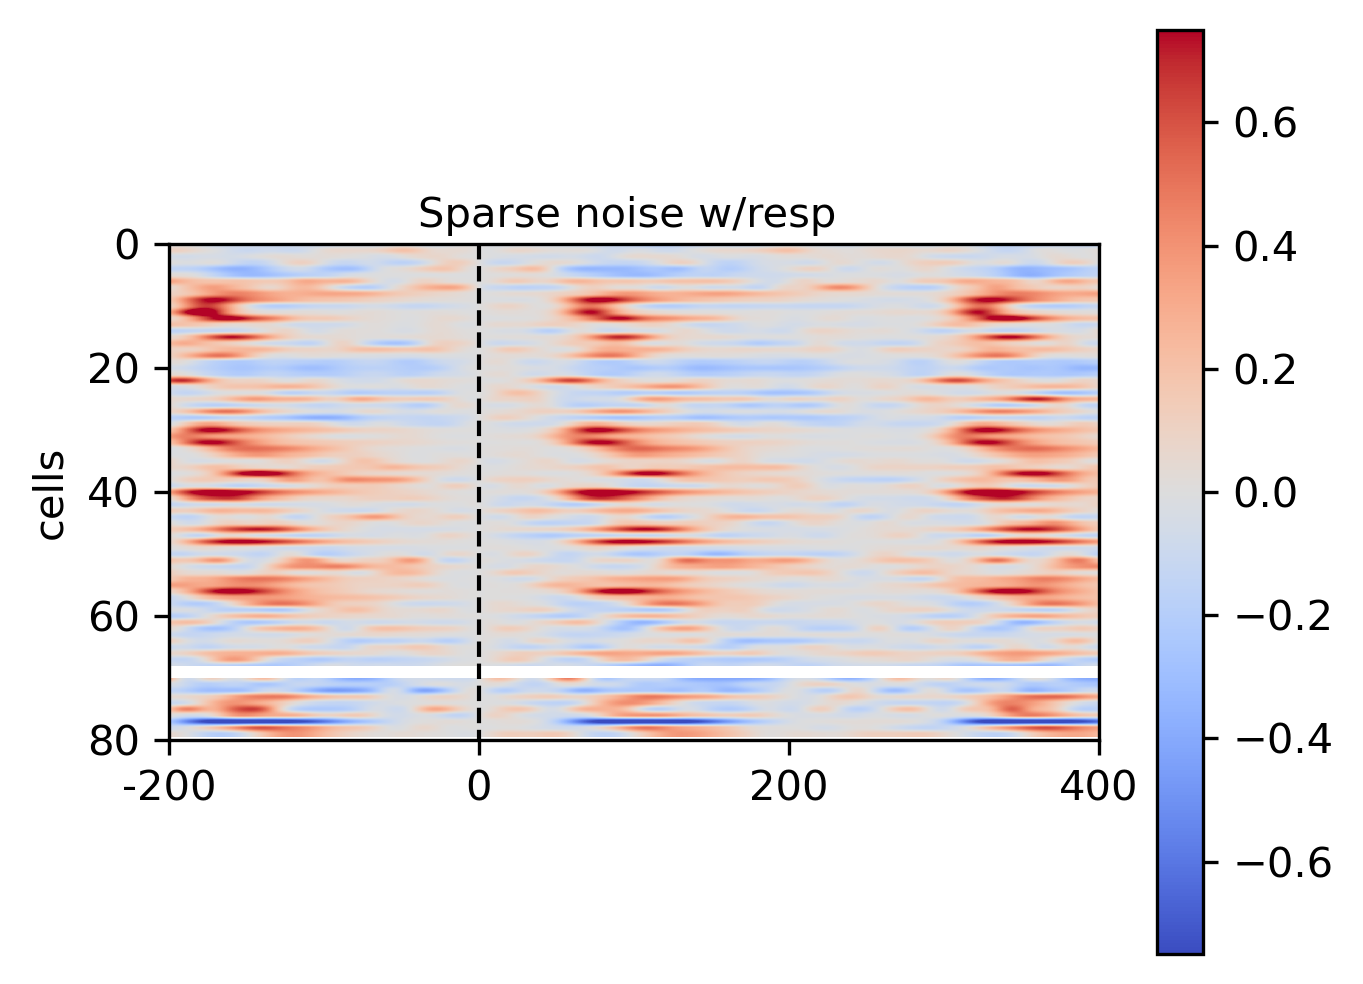

In [273]:
#plt of sparsenoise response of sorted responsive cells 
fig, ax = plt.subplots(1,1, figsize=(5,4), dpi=300)
_im = sacc.plot_PSTH_heatmap(ax, sparsenoiseall[sorted_resp,:], cscale=0.75)
ax.set_aspect(4.)

plt.colorbar(ax=ax, mappable=_im)
plt.xlabel("Sparse noise w/resp ")
ax.xaxis.set_label_position("top")

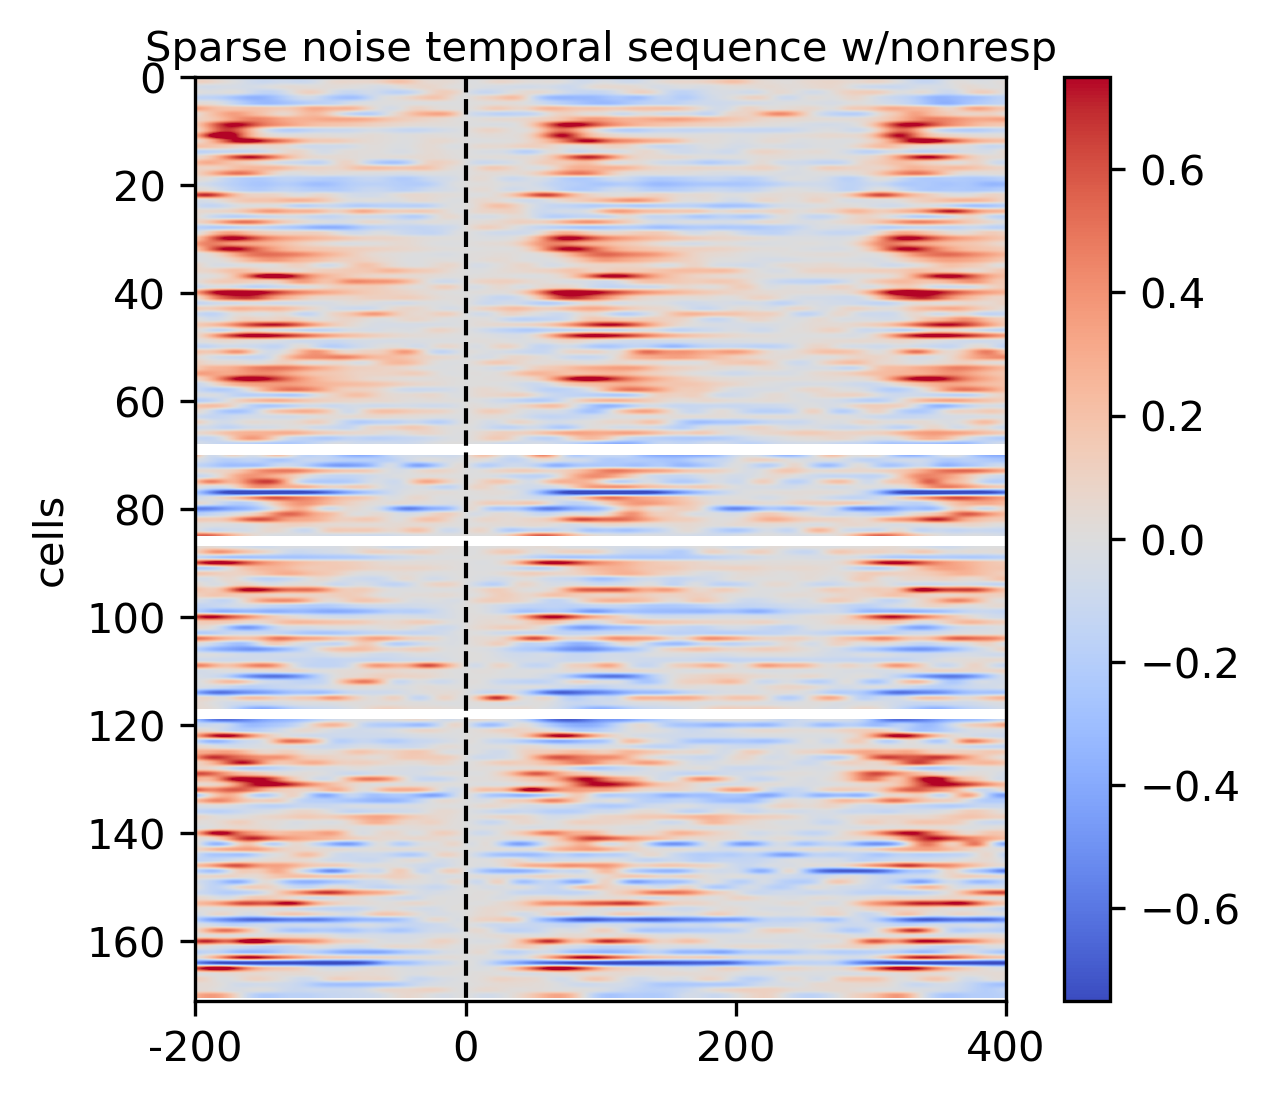

In [274]:
#plt of sparse noise responses of all cells sorted by latency
fig, ax = plt.subplots(1,1, figsize=(5,4), dpi=300)
_im = sacc.plot_PSTH_heatmap(ax, sparsenoiseall[sorted_all,:], cscale=0.75)
ax.set_aspect(4.)

plt.colorbar(ax=ax, mappable=_im)
plt.xlabel("Sparse noise temporal sequence w/nonresp")
ax.xaxis.set_label_position("top")


In [258]:
#code chunk to sort gazeshift by peak T
sorted_df = hffm.copy()
sorted_df = sorted_df[sorted_df['gazecluster']!='unresponsive']
sorted_df.dropna(axis=0, inplace=True)
sorted_df.reset_index(inplace=True)
sorted_df.sort_values(by='FmLt_gazeshift_peakT', inplace=True)
inds_by_peakT = sorted_df.index.values

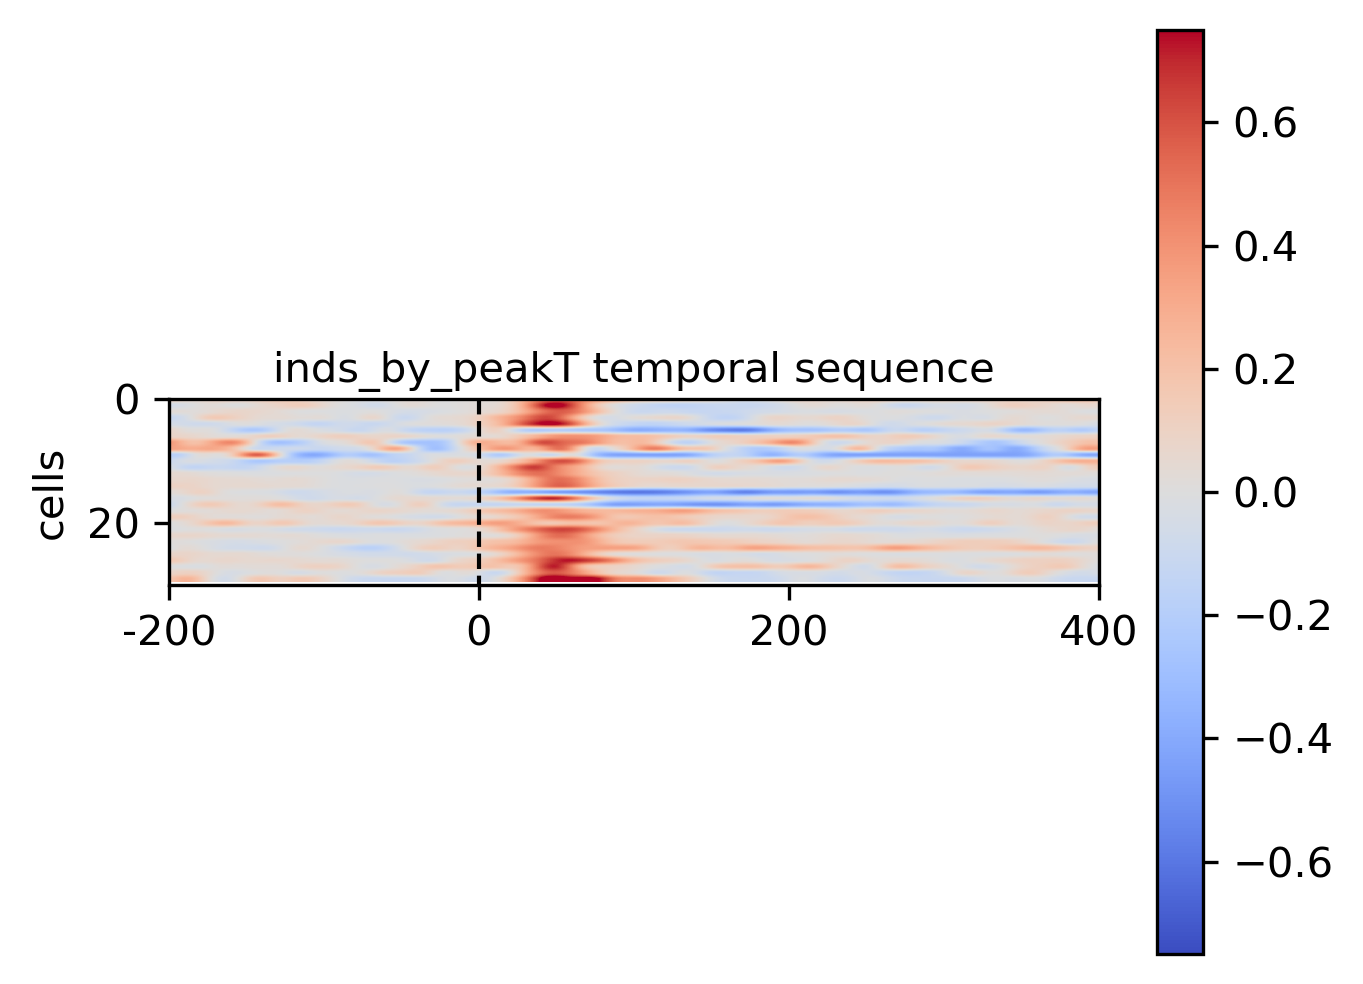

In [259]:
#plot of indices by peak T
fig, ax = plt.subplots(1,1, figsize=(5,4), dpi=300)
_im = sacc.plot_PSTH_heatmap(ax, temporal_sequence[inds_by_peakT,:], cscale=0.75)
ax.set_aspect(4.)

plt.colorbar(ax=ax, mappable=_im)
plt.xlabel("inds_by_peakT temporal sequence")
ax.xaxis.set_label_position("top")

In [131]:
pref_gaze_psth=fme.flatten_series(hffm['pref_gazeshift_psth']) #variable for preferred gazeshift psth use fme.flattenseries so that we can do mean,std,etc. calcs on array

In [137]:
early_group = pref_gaze_psth[hffm['gazecluster']=='early']
np.mean(early_group)

late_group = pref_gaze_psth[hffm['gazecluster']=='late']

biphasic_group = pref_gaze_psth[hffm['gazecluster']=='biphasic']

negative_group = pref_gaze_psth[hffm['gazecluster']=='negative']




In [1]:
resp = hffm.index[hffm['gazecluster']!='unresponsive'].to_numpy() #make an array of all cells that are responsive (early, late,biphasic,negative)
nonresp = hffm.index[hffm['gazecluster']=='unresponsive'].to_numpy() #make an array of cells athat are labeled unresponsive by clustering

NameError: name 'hffm' is not defined

In [199]:
print(hffm['gazecluster'])
print(resp)
resp[0]

0      unresponsive
1      unresponsive
2      unresponsive
3      unresponsive
4             early
           ...     
166    unresponsive
167    unresponsive
168    unresponsive
169    unresponsive
170    unresponsive
Name: gazecluster, Length: 171, dtype: object
[  4   5  11  14  15  17  20  22  23  24  25  26  29  30  31  33  34  35
  37  38  39  41  42  43  45  46  50  53  54  57  58  59  60  61  62  63
  64  65  67  68  69  70  72  73  74  76  80  85  88  91  92  94  95  96
 103 104 106 107 109 111 112 114 115 117 119 120 121 125 126 127 130 132
 134 136 137 138 140 142 144 164]


4

#### Cluster mean plots

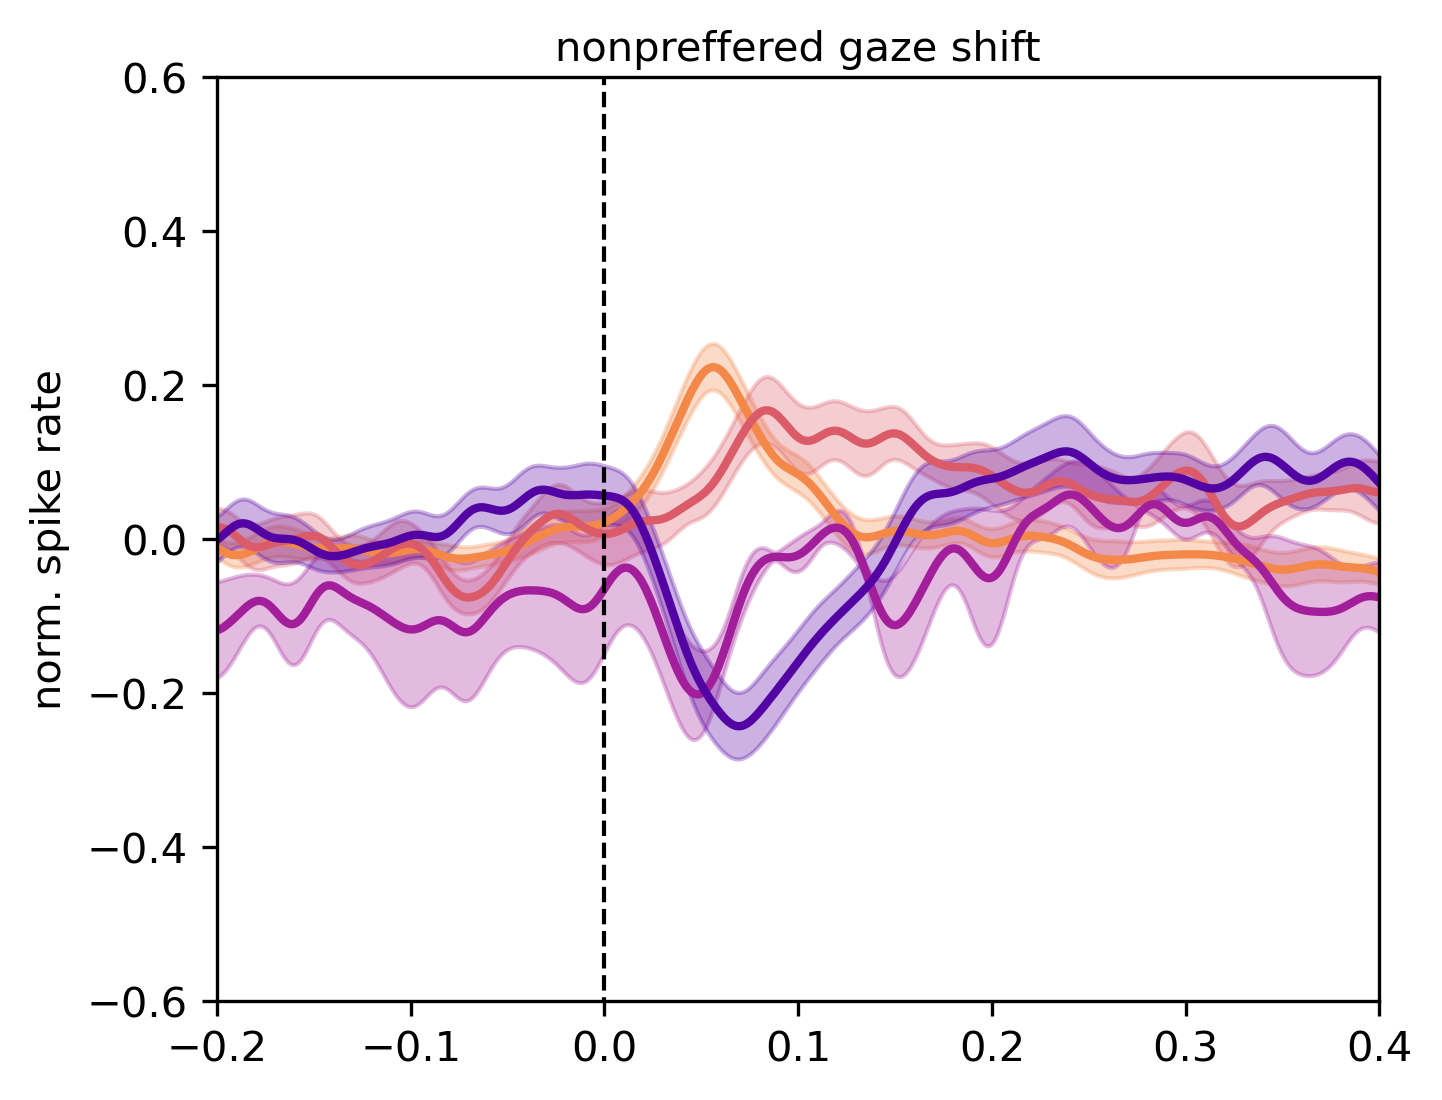

In [257]:
fig, ax = plt.subplots(1,1, figsize=(5,4), dpi=300)
names = ['early','late', 'biphasic','negative']
for count, name in enumerate(names):
    cluster_psths = fme.flatten_series(hffm['nonpref_gazeshift_psth'][hffm['gazecluster']==name])
    clustmean = np.nanmean(cluster_psths,0)
    clusterr = np.std(cluster_psths,0)/ np.sqrt(np.size(cluster_psths,0))
    plt.plot(psth_bins, clustmean, '-', linewidth=2, color=colors[name])
    plt.fill_between(psth_bins, clustmean-clusterr, clustmean+clusterr,color=colors[name],alpha=0.3)
plt.xlim([-0.2,0.4]); plt.ylim([-.6,.6])
plt.ylabel('norm. spike rate'); plt.xlabel('time (msec)')
ax.vlines(0,-1,1,color='k',linestyle='dashed',linewidth=1)
#ax_clusters.set_xticks(np.linspace(-0.2,0.4,4), labels=np.linspace(-200,400,4).astype(int))
#ax_clusters.set_yticks(np.linspace(-0.5,0.5,3))
plt.xlabel("nonpreffered gaze shift")

ax.xaxis.set_label_position("top")

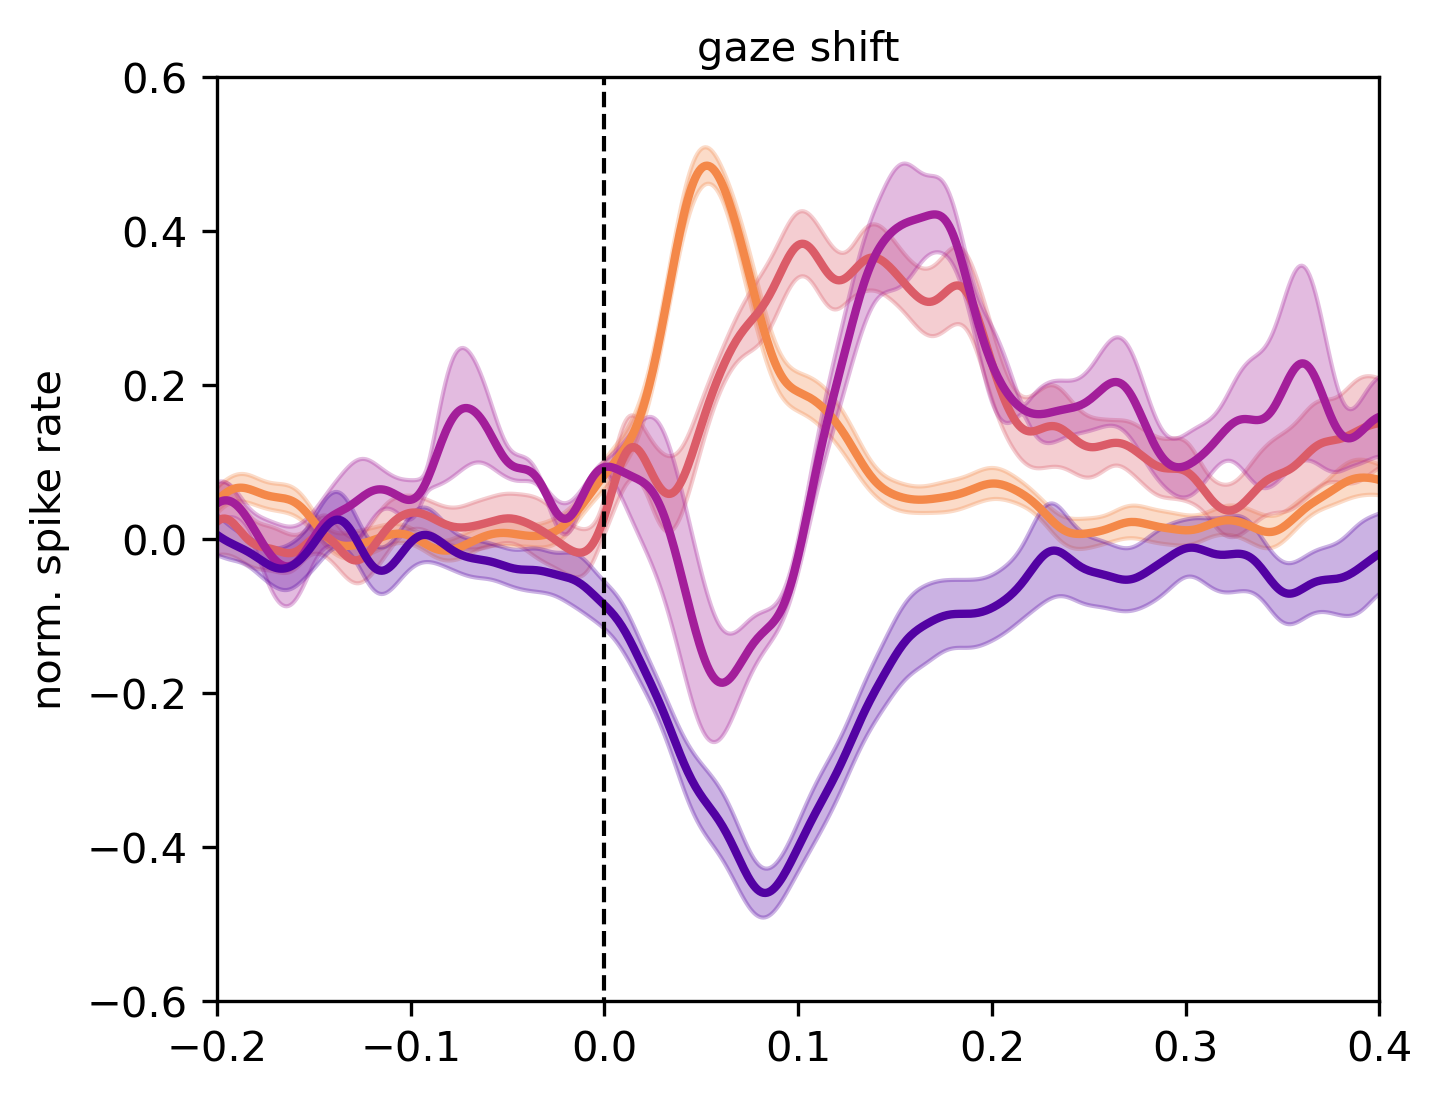

In [159]:
#plot of preferred gaze shifts
fig, ax = plt.subplots(1,1, figsize=(5,4), dpi=300)
names = ['early','late', 'biphasic','negative'] #names for clusters
for count, name in enumerate(names):  #for loop to iterate through calc each mean/std for each cluster and plot on top of each other
    cluster_psths = fme.flatten_series(hffm['pref_gazeshift_psth'][hffm['gazecluster']==name])
    clustmean = np.nanmean(cluster_psths,0)
    clusterr = np.std(cluster_psths,0)/ np.sqrt(np.size(cluster_psths,0))
    plt.plot(psth_bins, clustmean, '-', linewidth=2, color=colors[name])
    plt.fill_between(psth_bins, clustmean-clusterr, clustmean+clusterr,color=colors[name],alpha=0.3)
plt.xlim([-0.2,0.4]); plt.ylim([-.6,.6])
plt.ylabel('norm. spike rate'); plt.xlabel('time (msec)')
ax.vlines(0,-1,1,color='k',linestyle='dashed',linewidth=1)
#ax_clusters.set_xticks(np.linspace(-0.2,0.4,4), labels=np.linspace(-200,400,4).astype(int))
#ax_clusters.set_yticks(np.linspace(-0.5,0.5,3))
plt.xlabel("gaze shift")

ax.xaxis.set_label_position("top")

In [ ]:
for count, name in enumerate(names):
        data = hffm[hffm['gazecluster']==name][hffm['Sn_responsive']]
        cluster_psths = fme.flatten_series(data['norm_Sn_psth'])
        cluster_psths = cluster_psths[~np.isnan(cluster_psths).any(axis=1)]
        clustmean = np.nanmean(cluster_psths, 0)
        clusterr = np.std(cluster_psths, 0) / np.sqrt(np.size(cluster_psths,0))
        plt.plot(psth_bins, clustmean, '-', linewidth=2, color=colors[name])
        plt.fill_between(psth_bins, clustmean-clusterr, clustmean+clusterr, color=colors[name], alpha=0.3)

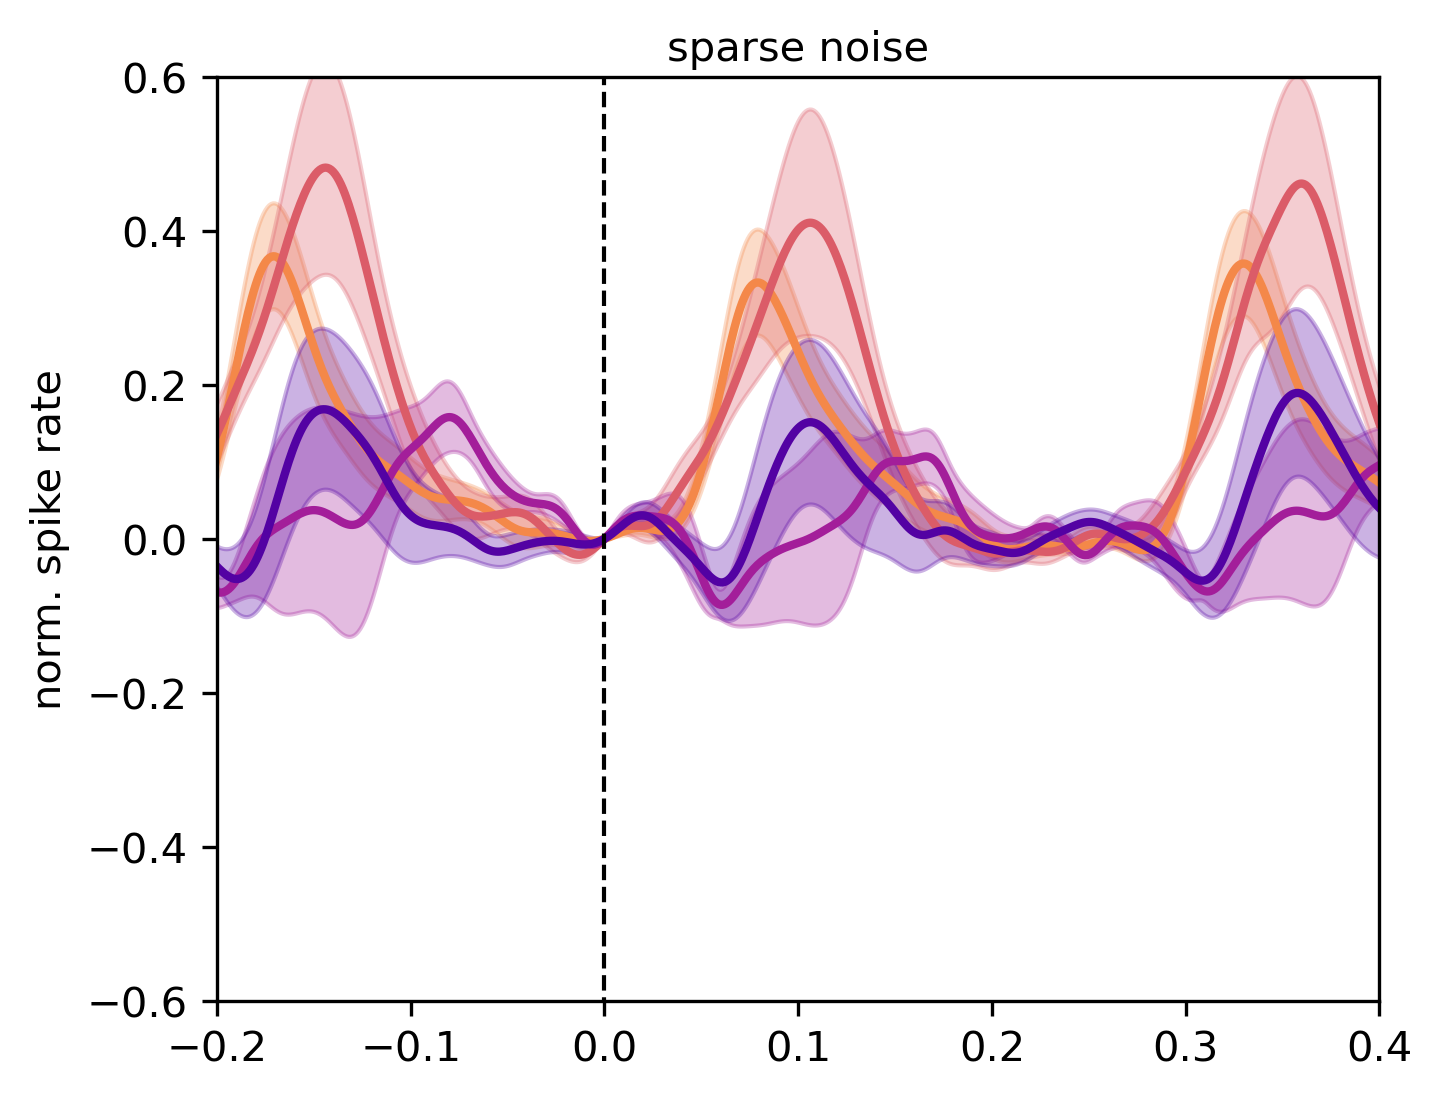

In [280]:
#plot of mean sparsenoise response for all clusters
fig, ax = plt.subplots(1,1, figsize=(5,4), dpi=300)
names = ['early','late', 'biphasic','negative'] #names for clusters
for count, name in enumerate(names):
        data = hffm[hffm['gazecluster']==name][hffm['Sn_responsive']]
        cluster_psths = fme.flatten_series(data['norm_Sn_psth'])
        cluster_psths = cluster_psths[~np.isnan(cluster_psths).any(axis=1)]
        clustmean = np.nanmean(cluster_psths, 0)
        clusterr = np.std(cluster_psths, 0) / np.sqrt(np.size(cluster_psths,0))
        plt.plot(psth_bins, clustmean, '-', linewidth=2, color=colors[name])
        plt.fill_between(psth_bins, clustmean-clusterr, clustmean+clusterr, color=colors[name], alpha=0.3)                                                                                                                                                                     
plt.xlim([-0.2,0.4]); plt.ylim([-.6,.6])
plt.ylabel('norm. spike rate'); plt.xlabel('time (msec)')
ax.vlines(0,-1,1,color='k',linestyle='dashed',linewidth=1)
#ax_clusters.set_xticks(np.linspace(-0.2,0.4,4), labels=np.linspace(-200,400,4).astype(int))
#ax_clusters.set_yticks(np.linspace(-0.5,0.5,3))
plt.xlabel("sparse noise")

ax.xaxis.set_label_position("top")

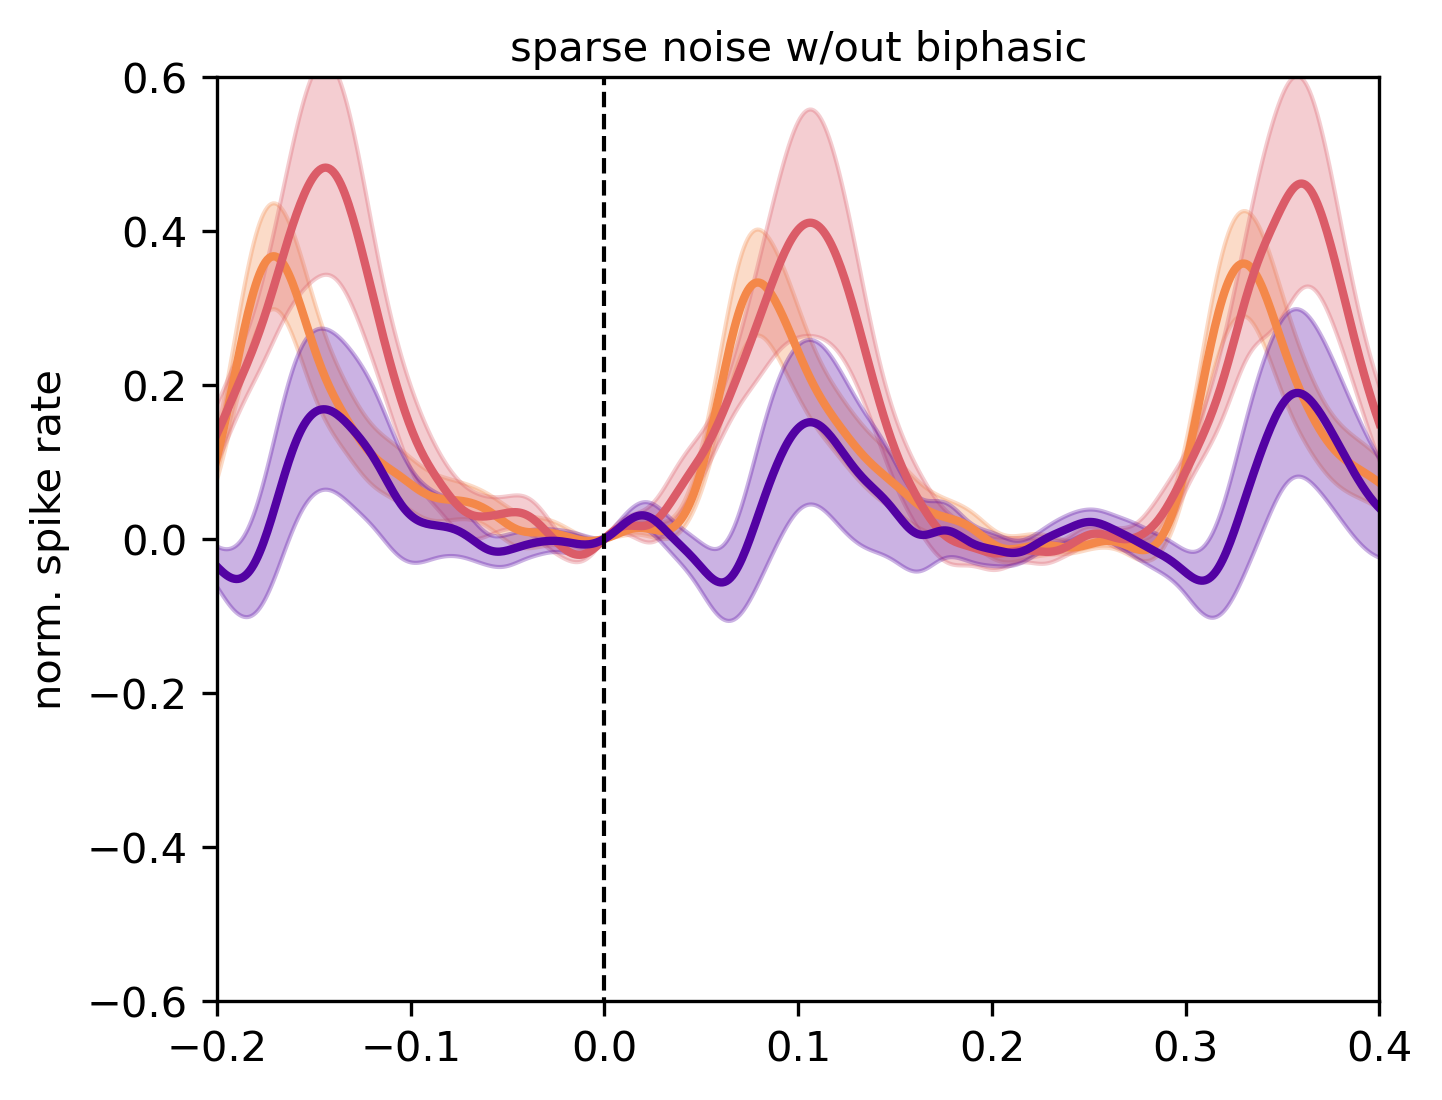

In [281]:
#plot of mean sparsenoise response for all clusters but biphasic
fig, ax = plt.subplots(1,1, figsize=(5,4), dpi=300)
names = ['early','late','negative'] #names for clusters
for count, name in enumerate(names):
        data = hffm[hffm['gazecluster']==name][hffm['Sn_responsive']]
        cluster_psths = fme.flatten_series(data['norm_Sn_psth'])
        cluster_psths = cluster_psths[~np.isnan(cluster_psths).any(axis=1)]
        clustmean = np.nanmean(cluster_psths, 0)
        clusterr = np.std(cluster_psths, 0) / np.sqrt(np.size(cluster_psths,0))
        plt.plot(psth_bins, clustmean, '-', linewidth=2, color=colors[name])
        plt.fill_between(psth_bins, clustmean-clusterr, clustmean+clusterr, color=colors[name], alpha=0.3)                                                                                                                                                                     
plt.xlim([-0.2,0.4]); plt.ylim([-.6,.6])
plt.ylabel('norm. spike rate'); plt.xlabel('time (msec)')
ax.vlines(0,-1,1,color='k',linestyle='dashed',linewidth=1)
#ax_clusters.set_xticks(np.linspace(-0.2,0.4,4), labels=np.linspace(-200,400,4).astype(int))
#ax_clusters.set_yticks(np.linspace(-0.5,0.5,3))
plt.xlabel("sparse noise w/out biphasic")

ax.xaxis.set_label_position("top")

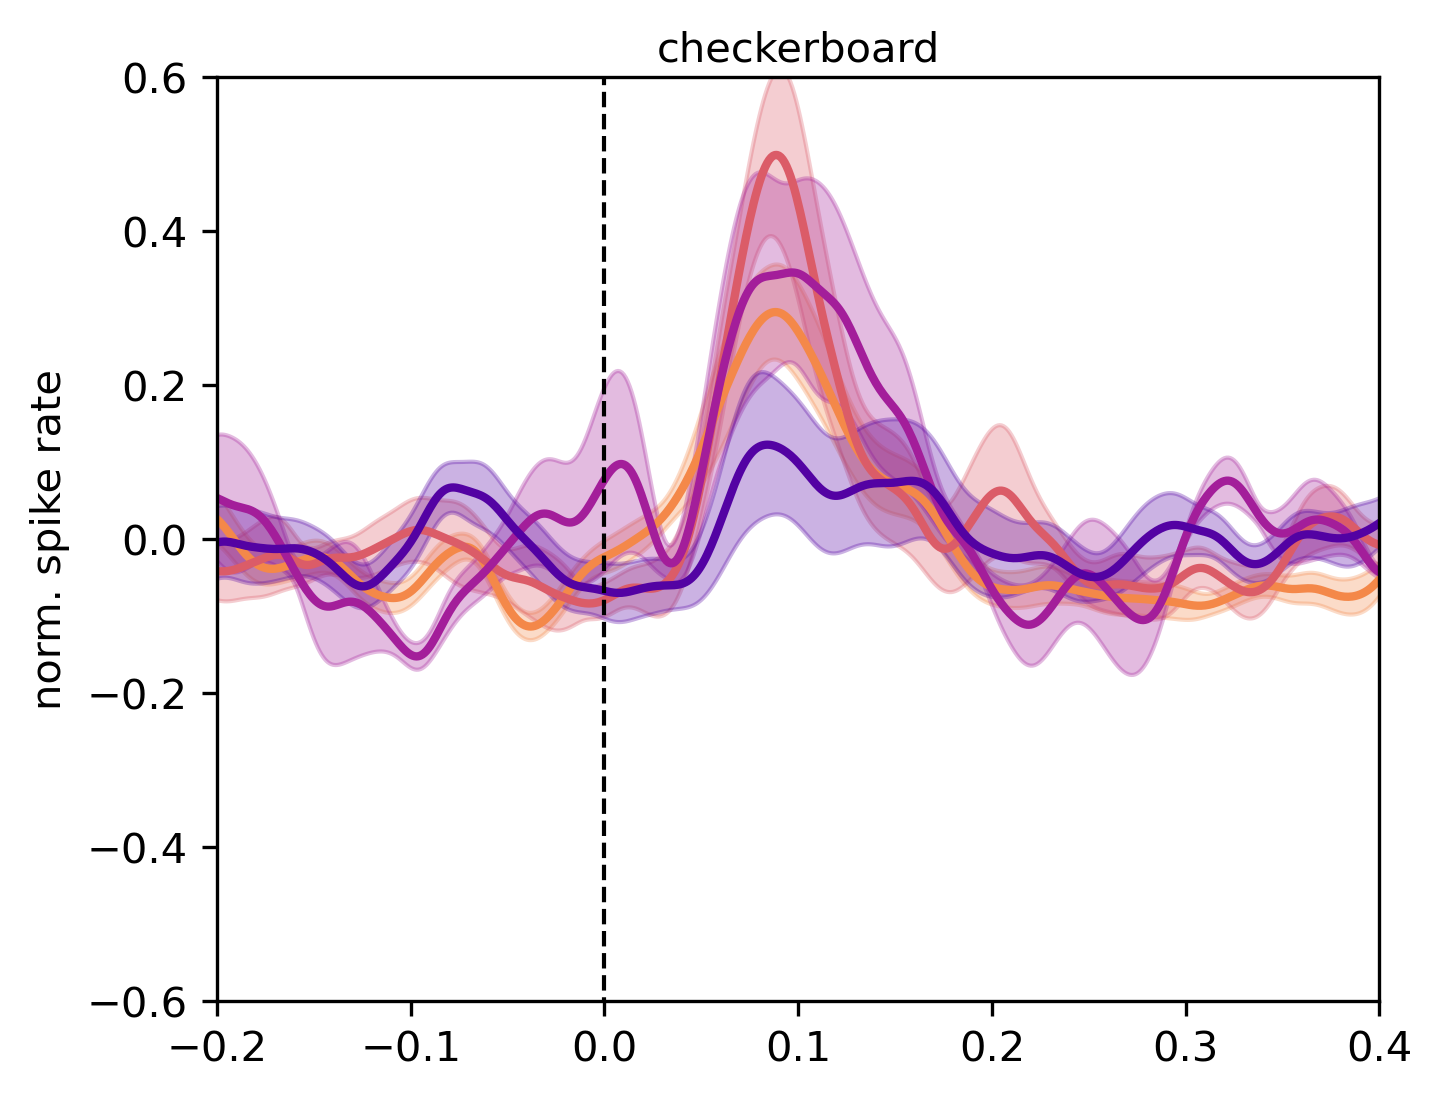

In [285]:
#plot of mean rev checkerboard response for all clusters
fig, ax = plt.subplots(1,1, figsize=(5,4), dpi=300)
names = ['early','late','biphasic','negative'] #names for clusters
for count, name in enumerate(names):
        data = hffm[hffm['gazecluster']==name][hffm['Rc_responsive']]
        cluster_psths = fme.flatten_series(data['norm_Rc_psth'])
        cluster_psths = cluster_psths[~np.isnan(cluster_psths).any(axis=1)]
        clustmean = np.nanmean(cluster_psths, 0)
        clusterr = np.std(cluster_psths, 0) / np.sqrt(np.size(cluster_psths,0))
        plt.plot(psth_bins, clustmean, '-', linewidth=2, color=colors[name])
        plt.fill_between(psth_bins, clustmean-clusterr, clustmean+clusterr, color=colors[name], alpha=0.3)                                                                                                                                                                     
plt.xlim([-0.2,0.4]); plt.ylim([-.6,.6])
plt.ylabel('norm. spike rate'); plt.xlabel('time (msec)')
ax.vlines(0,-1,1,color='k',linestyle='dashed',linewidth=1)
#ax_clusters.set_xticks(np.linspace(-0.2,0.4,4), labels=np.linspace(-200,400,4).astype(int))
#ax_clusters.set_yticks(np.linspace(-0.5,0.5,3))
plt.xlabel("checkerboard")

ax.xaxis.set_label_position("top")

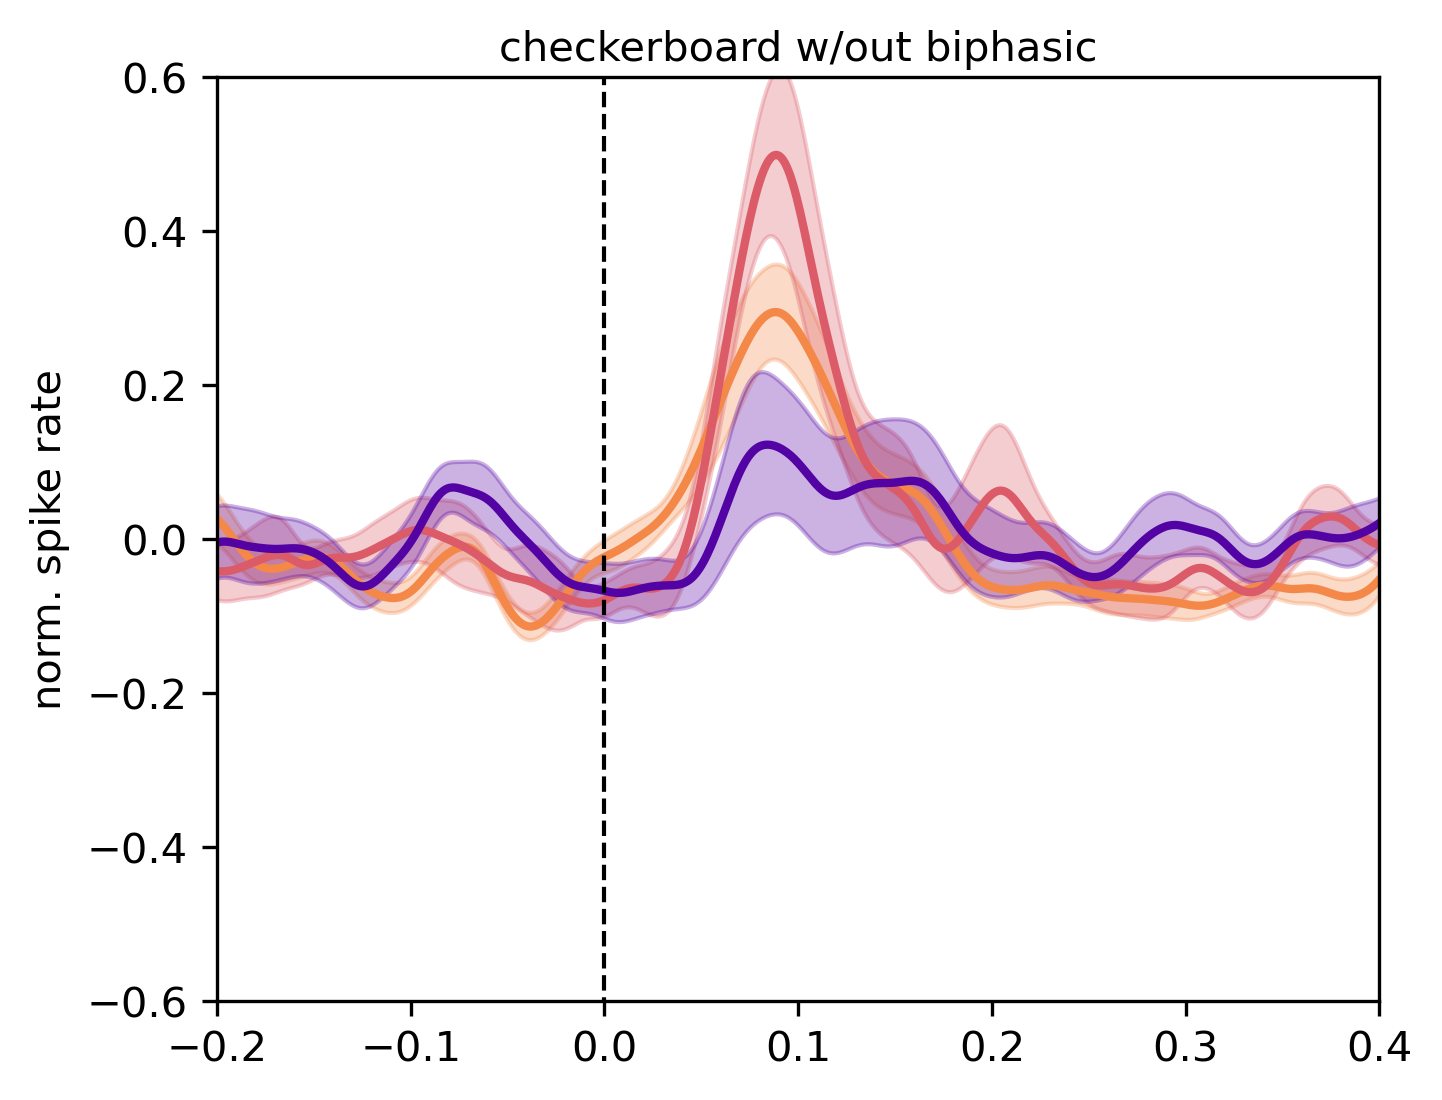

In [284]:
#plot of mean rev checkerboard response for all clusters but biphasic
fig, ax = plt.subplots(1,1, figsize=(5,4), dpi=300)
names = ['early','late','negative'] #names for clusters
for count, name in enumerate(names):
        data = hffm[hffm['gazecluster']==name][hffm['Rc_responsive']]
        cluster_psths = fme.flatten_series(data['norm_Rc_psth'])
        cluster_psths = cluster_psths[~np.isnan(cluster_psths).any(axis=1)]
        clustmean = np.nanmean(cluster_psths, 0)
        clusterr = np.std(cluster_psths, 0) / np.sqrt(np.size(cluster_psths,0))
        plt.plot(psth_bins, clustmean, '-', linewidth=2, color=colors[name])
        plt.fill_between(psth_bins, clustmean-clusterr, clustmean+clusterr, color=colors[name], alpha=0.3)                                                                                                                                                                     
plt.xlim([-0.2,0.4]); plt.ylim([-.6,.6])
plt.ylabel('norm. spike rate'); plt.xlabel('time (msec)')
ax.vlines(0,-1,1,color='k',linestyle='dashed',linewidth=1)
#ax_clusters.set_xticks(np.linspace(-0.2,0.4,4), labels=np.linspace(-200,400,4).astype(int))
#ax_clusters.set_yticks(np.linspace(-0.5,0.5,3))
plt.xlabel("checkerboard w/out biphasic")

ax.xaxis.set_label_position("top")

#### Bar plot v1 & sc cells in each cluster

In [25]:
1.5 + 18.9 +23.7 + 9.2

53.3

In [28]:
11.5/53.5*100



21.49532710280374

In [29]:
18.9/53.3*100

35.45966228893058

In [30]:
23.7/53.3*100

44.46529080675422

In [31]:
9.2/55.3*100

16.636528028933093

In [32]:
24.6+ 8.2+ 1.75+12.3

46.849999999999994

In [33]:
24.6/46.8*100

52.56410256410257

In [34]:
8.2/46.8*100

17.52136752136752

In [35]:
1.75/46.8*100

3.7393162393162394

In [36]:
12.3/46.8*100

26.282051282051285

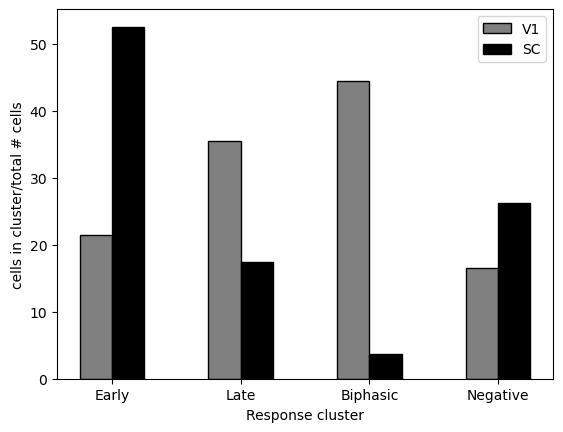

In [37]:
 
#V1 = [11.5, 18.9, 23.7, 9.2, 36.7] 
V1 = [21.5, 35.5, 44.5, 16.6]
#SC = [24.6, 8.2, 1.75, 12.3, 46.8] #171
SC = [52.6,17.5, 3.73, 26.3 ]
n=4
r = np.arange(n) 
width = 0.25
  
  
plt.bar(r, V1, color = 'grey', 
        width = width, edgecolor = 'black', 
        label='V1') 
plt.bar(r + width, SC, color = 'black', 
        width = width, edgecolor = 'black', 
        label='SC') 
  
plt.xlabel("Response cluster") 
plt.ylabel("cells in cluster/total # cells") 
#plt.title("Number of people voted in each year") 
  
# plt.grid(linestyle='--') 
plt.xticks(r + width/2,['Early','Late','Biphasic','Negative']) 
plt.legend() 
  
plt.show() 


In [18]:
(len(hffm['FmLt_compensatory_rightT'].iloc[0]) + len(hffm['FmLt_compensatory_leftT'].iloc[0]))/(len(hffm['FmLt_gazeshift_leftT'].iloc[0])+ len(hffm['FmLt_gazeshift_rightT'].iloc[0]) + len(hffm['FmLt_compensatory_leftT'].iloc[0]) + len(hffm['FmLt_compensatory_rightT'].iloc[0]))

0.772857964347326

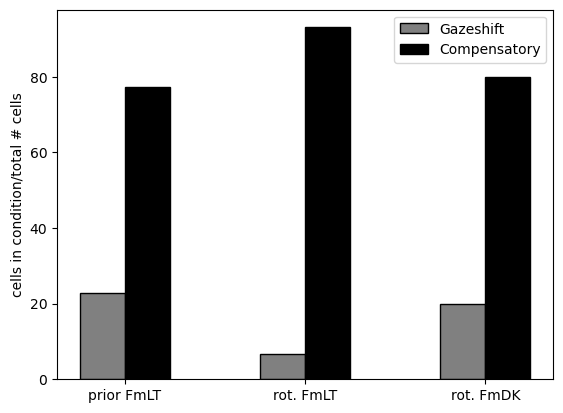

In [28]:
#V1 = [11.5, 18.9, 23.7, 9.2, 36.7] 
GS = [395, 6.8, 20.0]
#SC = [24.6, 8.2, 1.75, 12.3, 46.8] #171
CP = [1344, 93.1, 80.0]
n=3
r = np.arange(n) 
width = 0.25
  
  
plt.bar(r, GS, color = 'grey', 
        width = width, edgecolor = 'black', 
        label='Gazeshift') 
plt.bar(r + width, CP, color = 'black', 
        width = width, edgecolor = 'black', 
        label='Compensatory') 
  
#plt.xlabel("Response cluster") 
plt.ylabel("cells in condition/total # cells") 
#plt.title("Number of people voted in each year") 
  
# plt.grid(linestyle='--') 
plt.xticks(r + width/2,['prior FmLT', 'rot. FmLT', 'rot. FmDK']) 
plt.legend() 
  
plt.show() 

In [ ]:
names = ['early','late','biphasic','negative'] # 'unresponsive',
for count, name in enumerate(names):
    cluster_psths = flatten_series(hffm['pref_gazeshift_psth'][hffm['gazecluster']==name])
        clustmean = np.nanmean(cluster_psths, 0)
        clusterr = np.std(cluster_psths, 0) / np.sqrt(np.size(cluster_psths,0))
        ax_clusters.plot(psth_bins, clustmean, '-', linewidth=2, color=colors[name])
        ax_clusters.fill_between(psth_bins, clustmean-clusterr, clustmean+clusterr, color=colors[name], alpha=0.3)
    ax_clusters.set_xlim([-0.2,0.4]); ax_clusters.set_ylim([-.6,.6])
    # ax_clusters.annotate('early', xy=[0.19,-0.22], color=colors['early'], fontsize=11)
    # ax_clusters.annotate('late', xy=[0.19,-0.22-(step*1)], color=colors['late'], fontsize=11)
    # ax_clusters.annotate('biphasic', xy=[0.19,-0.22-(step*2)], color=colors['biphasic'], fontsize=11)
    # ax_clusters.annotate('negative', xy=[0.19,-0.22-(step*3)], color=colors['negative'], fontsize=11)
    ax_clusters.set_ylabel('norm. spike rate'); ax_clusters.set_xlabel('time (msec)')
    ax_clusters.vlines(0,-1,1,color='k',linestyle='dashed',linewidth=1)
    ax_clusters.set_xticks(np.linspace(-0.2,0.4,4), labels=np.linspace(-200,400,4).astype(int))
    ax_clusters.set_yticks(np.linspace(-0.5,0.5,3))

In [129]:
hffm['gazecluster']

0      unresponsive
1      unresponsive
2      unresponsive
3      unresponsive
4             early
           ...     
166    unresponsive
167    unresponsive
168    unresponsive
169    unresponsive
170    unresponsive
Name: gazecluster, Length: 171, dtype: object

(0.0, 40.0)

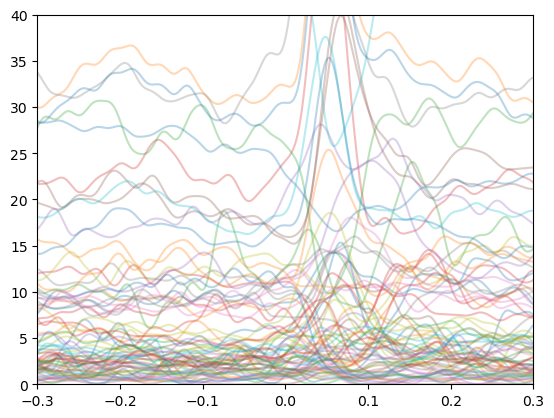

In [143]:
#plt of raw psths for preferred gazeshift of responsive cells
props = sacc.propsdict()
psth_bins = props['psth_bins']

for ind, row in hffm.iterrows():
    if row['gazecluster']!= 'unresponsive':
        plt.plot(psth_bins, row['pref_gazeshift_psth_raw'], alpha=0.3)
plt.xlim([-.3,.3])
plt.ylim([0,40])



In [ ]:
columns_view = [col for col in data.columns.values if 'tf_pref_cps' in col]
print(columns_view)

[]


In [ ]:
print(data.columns.values)

['FmLt_Amplitude' 'FmLt_ContamPct' 'FmLt_KSLabel' 'FmLt_amp' 'FmLt_ch'
 'FmLt_depth' 'FmLt_fr' 'FmLt_group' 'FmLt_n_spikes' 'FmLt_sh'
 'FmLt_waveform' 'FmLt_spikeT' 'FmLt_t0' 'FmLt_spikeTraw' 'FmLt_rate'
 'FmLt_contrast_tuning_bins' 'FmLt_contrast_tuning'
 'FmLt_contrast_tuning_err' 'FmLt_spike_triggered_average'
 'FmLt_spike_triggered_variance' 'FmLt_saccade_rightT'
 'FmLt_saccade_leftT' 'FmLt_compensatory_rightT' 'FmLt_compensatory_leftT'
 'FmLt_gazeshift_leftT' 'FmLt_gazeshift_rightT' 'FmLt_saccade_rightPSTH'
 'FmLt_saccade_leftPSTH' 'FmLt_compensatory_rightPSTH'
 'FmLt_compensatory_leftPSTH' 'FmLt_gazeshift_leftPSTH'
 'FmLt_gazeshift_rightPSTH' 'FmLt_pupilradius_tuning_bins'
 'FmLt_pupilradius_tuning' 'FmLt_pupilradius_tuning_err'
 'FmLt_theta_tuning_bins' 'FmLt_theta_tuning' 'FmLt_theta_tuning_err'
 'FmLt_phi_tuning_bins' 'FmLt_phi_tuning' 'FmLt_phi_tuning_err'
 'FmLt_gyroz_tuning_bins' 'FmLt_gyroz_tuning' 'FmLt_gyroz_tuning_err'
 'FmLt_gyrox_tuning_bins' 'FmLt_gyrox_tuning' 'FmLt

In [61]:
revcheck = out["Rc_temseq"]

In [275]:
#sort fm values by latency from low to high
latency_fm = out["Fm_latency_unsort"]



#### Spatial and temporal frequency plots

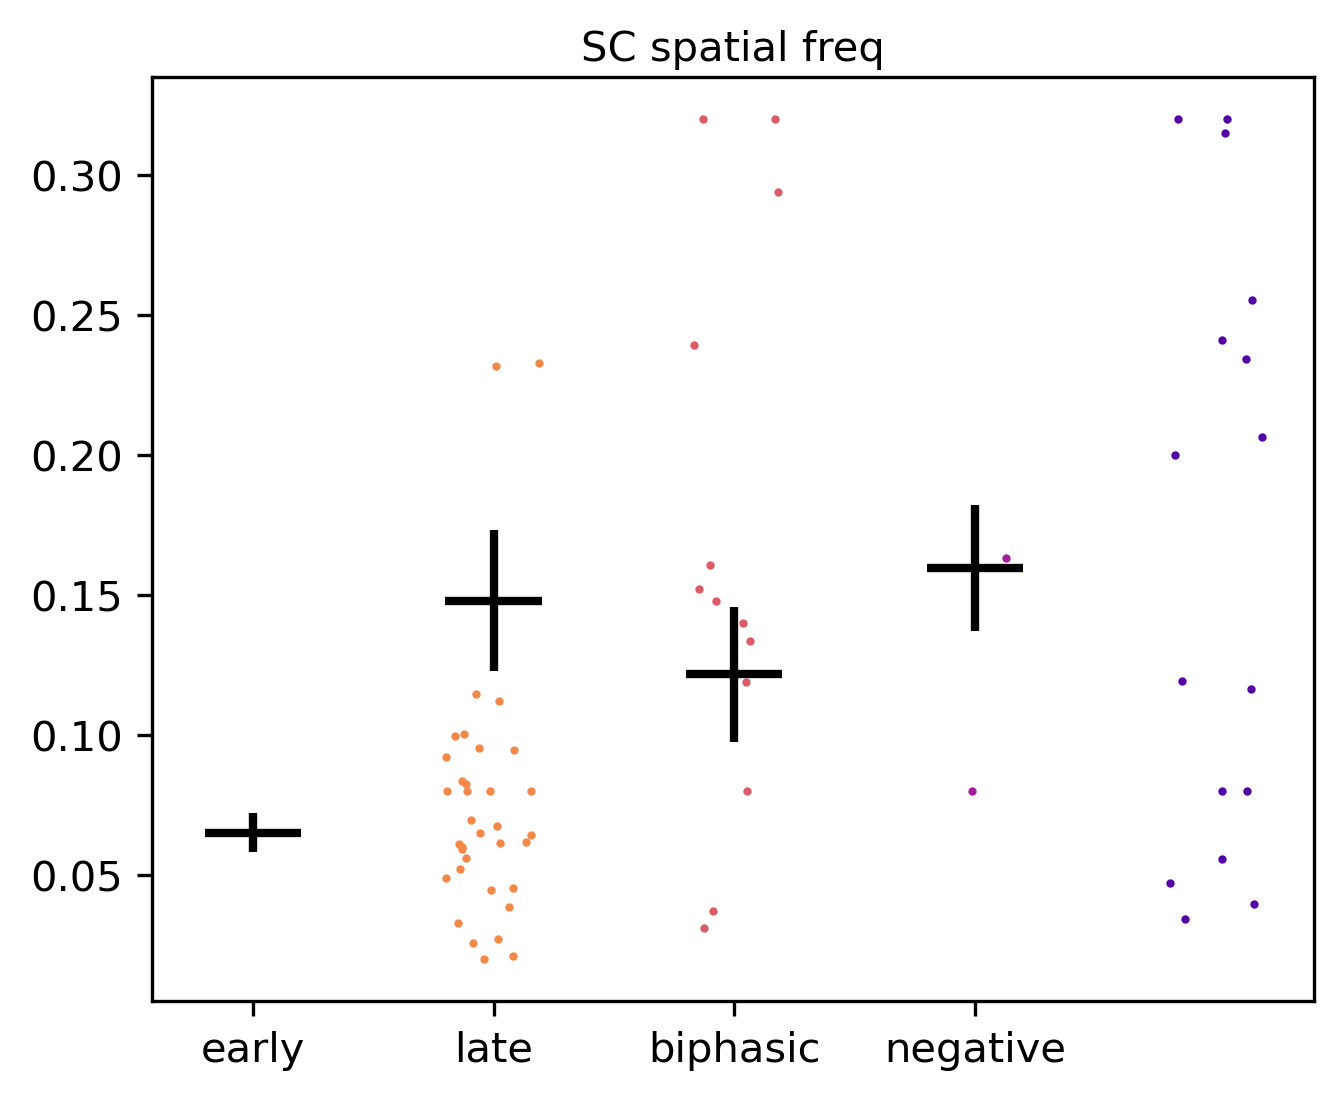

In [22]:
props = sacc.propsdict()
colors = props['colors']
fig, ax = plt.subplots(1,1, figsize = (5,4), dpi = 300)
sacc.plot_columns(ax, hffm, prop = 'sf_pref_cpd', cat = 'gazecluster', cats = ['early', 'late', 'biphasic','negative'], colors = colors, use_median= True)
#plt.plot(markersize = 3)
plt.xlabel("SC spatial freq")
ax.xaxis.set_label_position("top")
plt.savefig('Z:/Shelby/Figs/SCspatialfreq.eps', format='eps')

In [4]:
sacc.plot_columns

<function saccadeAnalysis.utils.figs.plot_columns(ax, df, prop, cat=None, cats=None, colors=None, use_median=False)>

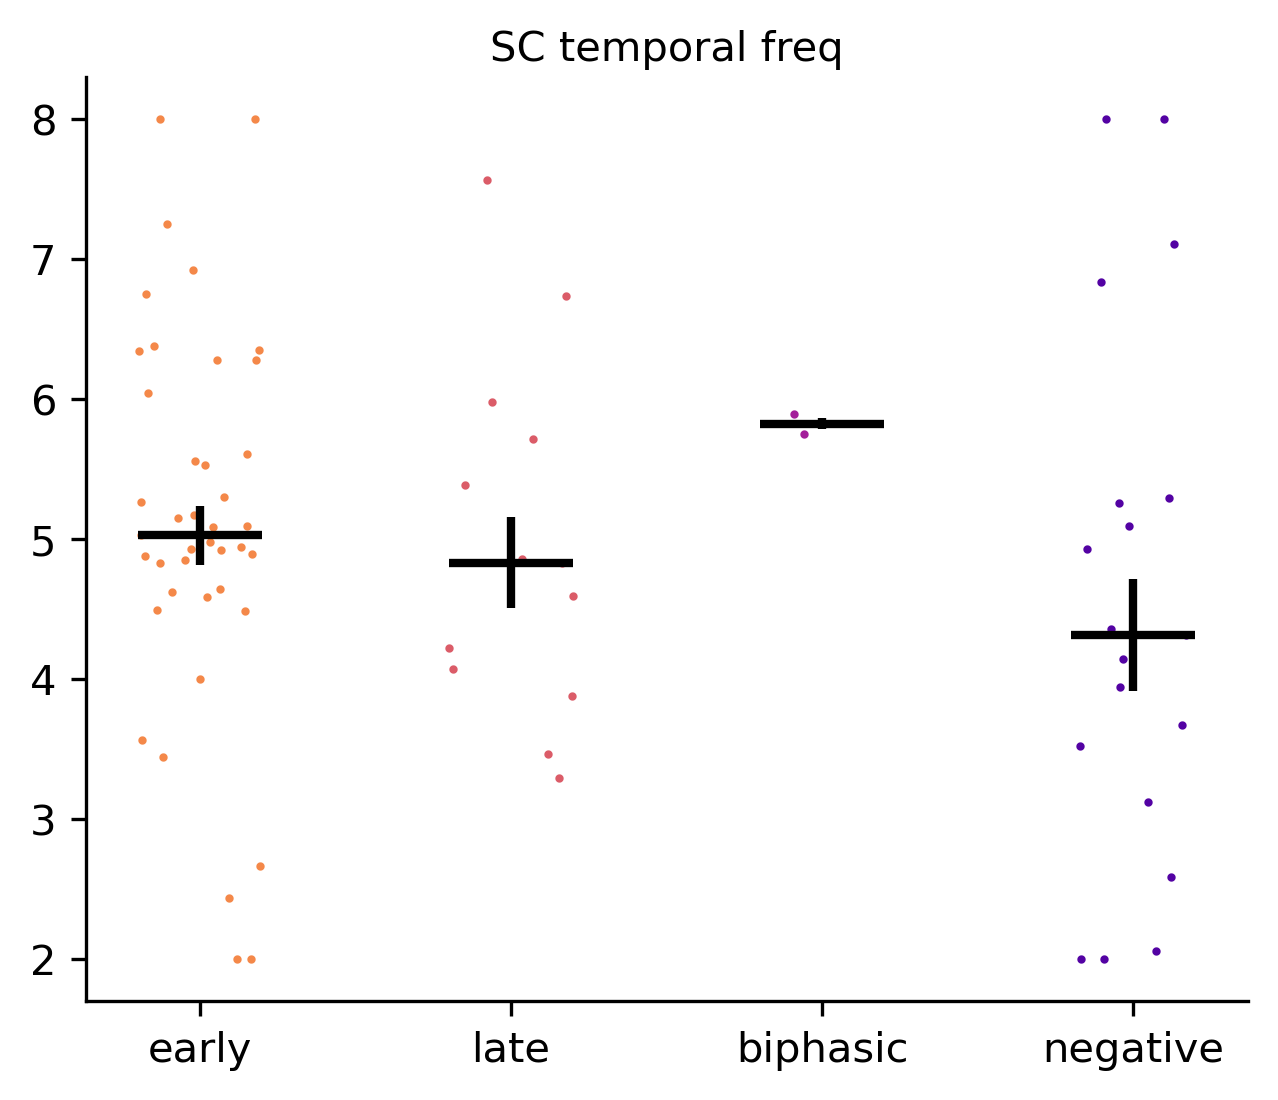

In [128]:
props = sacc.propsdict()
colors = props['colors']
fig, ax = plt.subplots(1,1, figsize = (5,4), dpi = 300)
sacc.plot_columns(ax, hffm, prop = 'tf_pref_cps', cat = 'gazecluster', cats = ['early', 'late', 'biphasic', 'negative'], colors = colors, use_median= True)
plt.xlabel("SC temporal freq")
ax.xaxis.set_label_position("top")
fig.save

TypeError: plot_tuning() got an unexpected keyword argument 'prop'

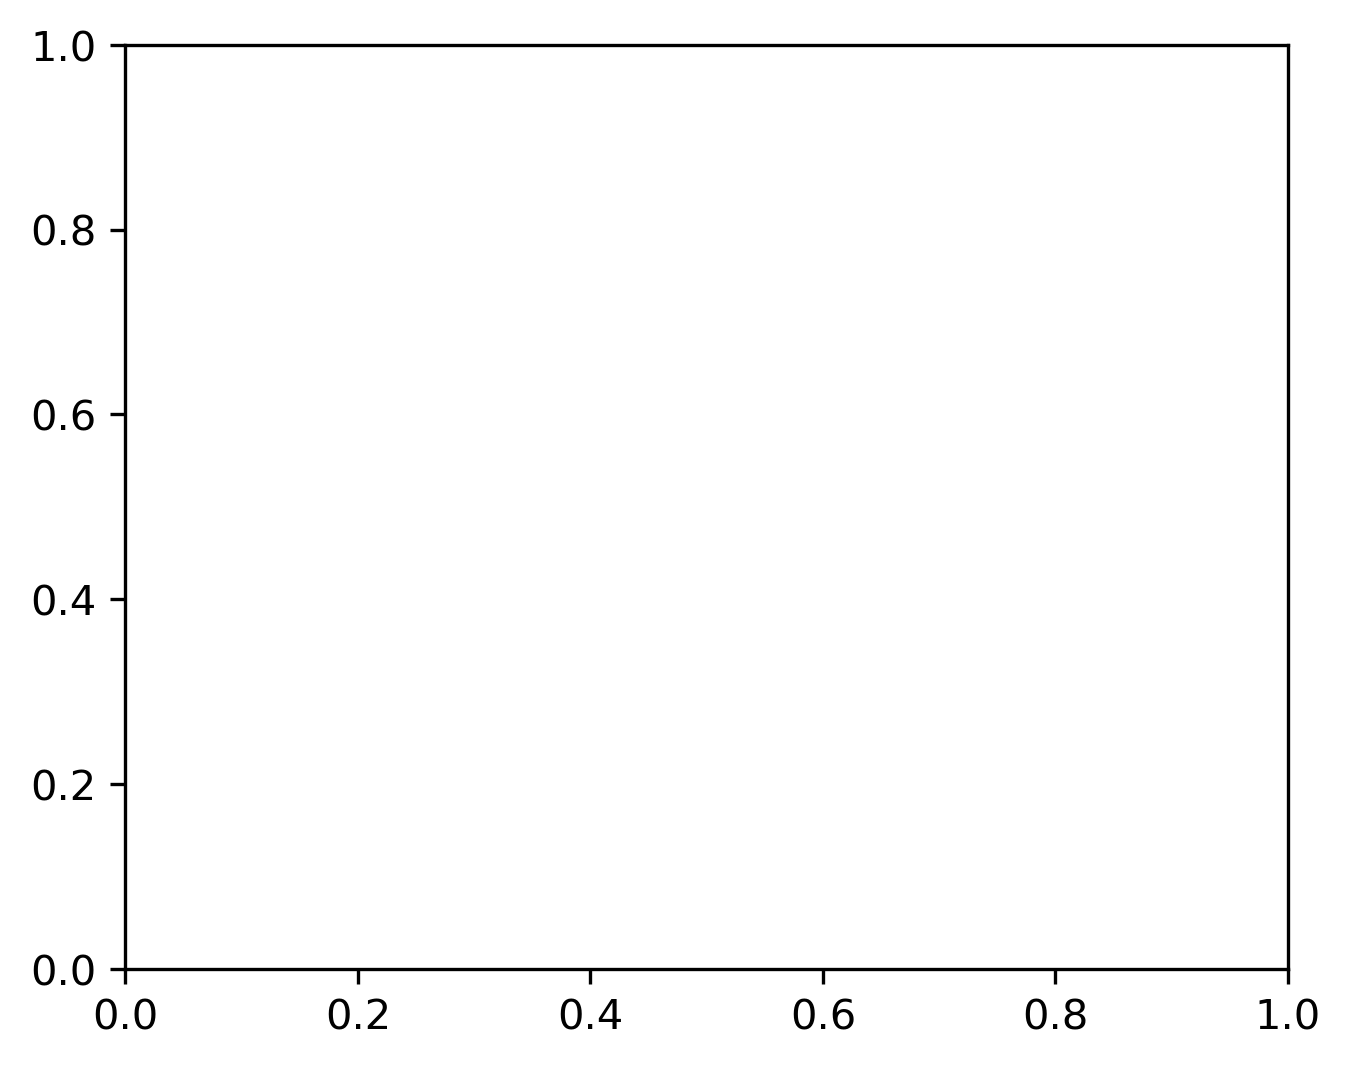

In [347]:
props = sacc.propsdict()
colors = props['colors']
fig, ax = plt.subplots(1,1, figsize = (5,4), dpi = 300)
sacc.plot_tuning(ax, hffm, prop = 'sf_pref_cpd', cat = 'gazecluster', cats = ['early', 'late', 'biphasic', 'negative'], colors = colors, use_median= True)
plt.xlabel("SC spatial freq")
ax.xaxis.set_label_position("top")

In [37]:
sacc.plot_tuning

<function saccadeAnalysis.utils.figs.plot_tuning(ax, bins, tuning, error, label=None, unum=None, ylim=None)>

In [344]:
cats = ['early', 'late', 'biphasic', 'negative']
np.array(range(len(cats)))+1

array([1, 2, 3, 4])

In [345]:
pd.unique(hffm['gazecluster']).tolist()

['unresponsive', 'early', 'negative', 'biphasic', 'late']

In [300]:
cdata = hffm['sf_pref_cpd'][hffm['gazecluster']=='negative']
np.size(cdata)

21

In [52]:
hffm['sf_pref_cpd'][hffm['gazecluster']=='unresponsive']

0      0.020000
1           NaN
2           NaN
3           NaN
6      0.320000
         ...   
166    0.080000
167    0.083512
168    0.081998
169         NaN
170    0.320000
Name: sf_pref_cpd, Length: 91, dtype: float64

In [46]:
len(hffm['sf_pref_cpd'][hffm['gazecluster']=='late'])

14

In [ ]:
hffm['sf_pref_cpd'][hffm['gazecluster']=='early']

4      0.020996
5      0.232829
15     0.069468
17     0.067532
22          NaN
23          NaN
29     0.099643
33          NaN
34          NaN
35          NaN
37     0.061165
38     0.061762
39     0.060021
45     0.082299
46     0.059341
50     0.020000
57     0.065111
58     0.061427
61     0.032715
62     0.027116
63     0.044707
64     0.045471
76     0.038466
80     0.231704
94     0.055916
96     0.064140
106    0.080000
107    0.083654
109    0.112024
111    0.092024
112    0.094737
114         NaN
115    0.114760
117         NaN
121    0.100457
126    0.080000
127    0.080000
130    0.080000
132    0.095476
136    0.025537
137    0.052257
142    0.048944
Name: sf_pref_cpd, dtype: float64

#### Corr Coefficient plots for SN and RC in SC

In [286]:
hffm['gaze_rc_maxcc'] = np.nan
hffm['gaze_sn_maxcc'] = np.nan
for ind, row in hffm[['norm_Rc_psth','norm_Sn_psth',
                      'pref_gazeshift_psth','Rc_responsive',
                      'Sn_responsive']][hffm['gazecluster']!='unresponsive'].iterrows():
    if row['Rc_responsive']:
        r = np.corrcoef(row['pref_gazeshift_psth'].astype(float)[1000:1250], row['norm_Rc_psth'].astype(float)[1000:1250])
        hffm.at[ind, 'gaze_rc_maxcc'] = r[0,1]
    if row['Sn_responsive']:
        r = np.corrcoef(row['pref_gazeshift_psth'].astype(float)[1000:1250], row['norm_Sn_psth'].astype(float)[1000:1250])
        hffm.at[ind, 'gaze_sn_maxcc'] = r[0,1]

rc_vals = hffm['gaze_rc_maxcc'][hffm['Rc_responsive']][hffm['gazecluster']!='unresponsive'].copy().dropna().reset_index(drop=True).to_numpy().astype(float)
sn_vals = hffm['gaze_sn_maxcc'][hffm['Sn_responsive']][hffm['gazecluster']!='unresponsive'].copy().dropna().reset_index(drop=True).to_numpy().astype(float)




AttributeError: Rectangle.set() got an unexpected keyword argument 'figsize'

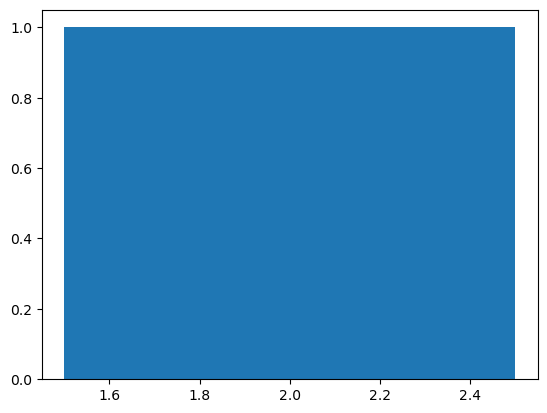

In [294]:
fig, ax = plt.hist(2,1,figsize=(2.5,3.2), dpi=300)
Rc_weights = np.ones_like(rc_vals) / float(len(rc_vals))
n,_,_ = ax.hist(rc_vals, color ='grey', bins=np.linspace(-1,1,21), alpha=0.8, weights=Rc_weights)
ax.set_ylabel('frac. cells')
ax.plot([0,0], [0, .22], color='k', linewidth=1, linestyle='dashed')
ax.set_ylim([0,.22])
ax.set_xlim([-1,1])

(-1.0, 1.0)

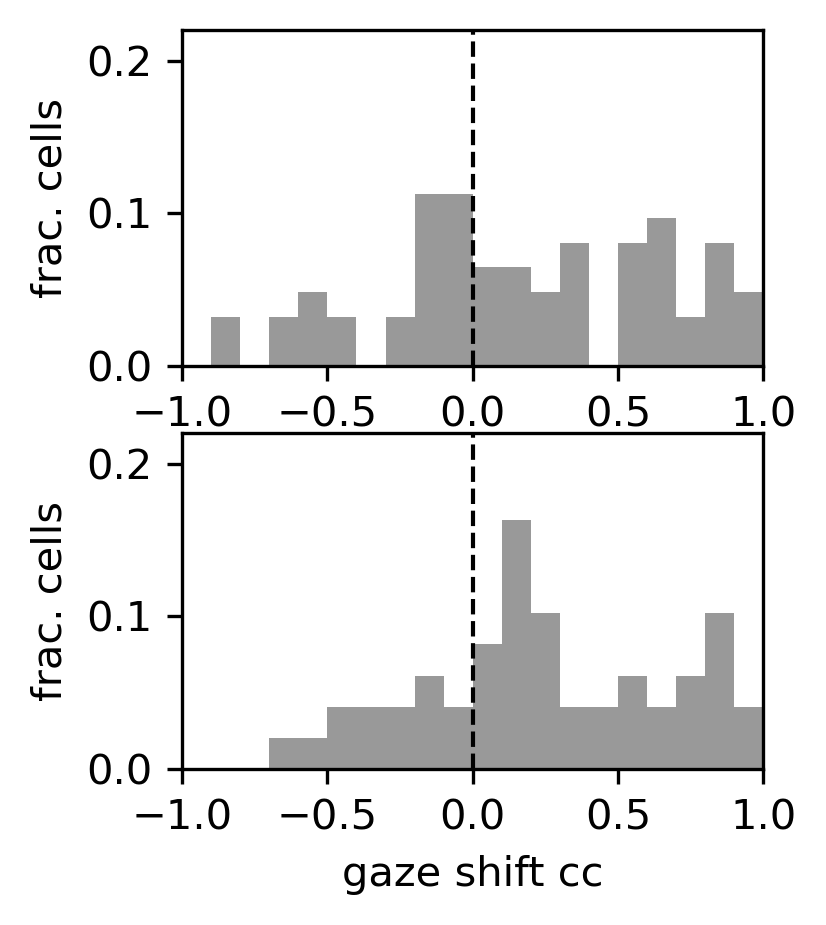

In [296]:
fig, [ax0,ax1] = plt.subplots(2,1,figsize=(2.5,3.2), dpi=300)
Rc_weights = np.ones_like(rc_vals) / float(len(rc_vals))
n,_,_ = ax0.hist(rc_vals, color='grey', bins=np.linspace(-1,1,21), alpha=0.8, weights=Rc_weights)
# ax0.set_xlabel('gaze shift cc');
ax0.set_ylabel('frac. cells')
# ax0.set_xticks(np.arange(-1,1,3))#,labels=[])
ax0.plot([0,0], [0, .22], color='k', linewidth=1, linestyle='dashed')
ax0.set_ylim([0,.22])
ax0.set_xlim([-1,1])
Sn_weights = np.ones_like(sn_vals) / float(len(sn_vals))
n,_,_ = ax1.hist(sn_vals, color='grey', bins=np.linspace(-1,1,21), alpha=0.8, weights=Sn_weights)
ax1.set_xlabel('gaze shift cc')
ax1.set_ylabel('frac. cells')
ax1.plot([0,0], [0, .22], color='k', linewidth=1, linestyle='dashed')
ax1.set_ylim([0,.22])
ax1.set_xlim([-1,1])

In [ ]:
hffm['gaze_rc_maxcc'] = np.nan
hffm['gaze_sn_maxcc'] = np.nan
for ind, row in hffm[['norm_Rc_psth','norm_Sn_psth',
'pref_gazeshift_psth','Rc_responsive',
'Sn_responsive']][hffm['gazecluster']!='unresponsive'].iterrows():
if row['Rc_responsive']:
 r = np.corrcoef(row['pref_gazeshift_psth'].astype(float)[1000:1250], row['norm_Rc_psth'].astype(float)[1000:1250])
            hffm.at[ind, 'gaze_rc_maxcc'] = r[0,1]
        if row['Sn_responsive']:
            r = np.corrcoef(row['pref_gazeshift_psth'].astype(float)[1000:1250], row['norm_Sn_psth'].astype(float)[1000:1250])
            hffm.at[ind, 'gaze_sn_maxcc'] = r[0,1]

    rc_vals = hffm['gaze_rc_maxcc'][hffm['Rc_responsive']][hffm['gazecluster']!='unresponsive'].copy().dropna().reset_index(drop=True).to_numpy().astype(float)
    sn_vals = hffm['gaze_sn_maxcc'][hffm['Sn_responsive']][hffm['gazecluster']!='unresponsive'].copy().dropna().reset_index(drop=True).to_numpy().astype(float)



In [3]:
unitsummary_recordings = fme.find('*ephys_props.h5', r'T:/freely_moving_ephys/ephys_recordings/021624/J685NC')
dfs = [pd.read_hdf(r) for r in unitsummary_recordings]

In [4]:
dfs

[     FmLt_Amplitude  FmLt_ContamPct FmLt_KSLabel    FmLt_amp  FmLt_ch  \
 6            1331.2            16.9          mua  109.441681        2   
 7            1822.5             0.6         good  105.917381        2   
 9            1280.9             0.0          mua  104.834763        5   
 10           1352.2             0.0          mua  104.749680        5   
 14           1400.4            13.7          mua  107.106552        5   
 ..              ...             ...          ...         ...      ...   
 189          2582.3             0.0         good  127.987610      122   
 190          1840.3             9.6         good  168.504456      123   
 191          6507.5             0.0         good  185.149231      123   
 194          2016.4             2.9         good  106.163719      125   
 195          1628.9            12.2          mua  122.543839      127   
 
      FmLt_depth   FmLt_fr FmLt_group  FmLt_n_spikes  FmLt_sh  ...  \
 6           725  2.211843       good   

In [5]:
dfs_unitsummary = sacc.add_stimuli_horizontally(dfs)

In [6]:
dfs_unitsummary.to_hdf('T:/freely_moving_ephys/ephys_recordings/021624/J685NC/unitsummarydata.h5', key='dfs') 
#run python -m saccadeAnalysis.unitSummary

Traceback (most recent call last):
  File "C:\Users\Niell Lab\.conda\envs\ephys1\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\Niell Lab\.conda\envs\ephys1\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\users\niell lab\documents\github\freely-moving-saccades\saccadeAnalysis\unitSummary.py", line 27, in <module>
    unitSummary()
  File "c:\users\niell lab\documents\github\freely-moving-saccades\saccadeAnalysis\unitSummary.py", line 22, in unitSummary
    sacc.summarize_units(data_filepath)
  File "c:\users\niell lab\documents\github\freely-moving-saccades\saccadeAnalysis\utils\unit_summary.py", line 447, in summarize_units
    sacc.movement_psth(ax=fig_fmdark_gaze_dEye,
TypeError: movement_psth() missing 1 required positional argument: 'row'

need to fix this

In [7]:
dfs_unitsummary

FmLt_Amplitude  FmLt_ContamPct FmLt_KSLabel    FmLt_amp  FmLt_ch  \
6            1331.2            16.9          mua  109.441681        2   
7            1822.5             0.6         good  105.917381        2   
9            1280.9             0.0          mua  104.834763        5   
10           1352.2             0.0          mua  104.749680        5   
14           1400.4            13.7          mua  107.106552        5   
..              ...             ...          ...         ...      ...   
189          2582.3             0.0         good  127.987610      122   
190          1840.3             9.6         good  168.504456      123   
191          6507.5             0.0         good  185.149231      123   
194          2016.4             2.9         good  106.163719      125   
195          1628.9            12.2          mua  122.543839      127   

     FmLt_depth   FmLt_fr FmLt_group  FmLt_n_spikes  FmLt_sh  ...  \
6           725  2.211843       good           9233        0  ...   
7           725  2.099011       good           8762        0  ...   
9           650  0.223987       good            935        0  ...   
10          650  0.143016       good            597        0  ...   
14          650  7.894888       good          32956        0  ...   
..          ...       ...        ...            ...      ...  ...   
189         125  0.119061       good            497        0  ...   
190         100  3.027779       good          12639        0  ...   
191         100  0.291543       good           1217        0  ...   
194          50  5.798033       good          24203        0  ...   
195           0  1.770337       good           7390        0  ...   

                            Rc_ballspeed_tuning_bins  \
6    [0.005, 0.055, 0.15000000000000002, 0.35, 0.75]   
7    [0.005, 0.055, 0.15000000000000002, 0.35, 0.75]   
9    [0.005, 0.055, 0.15000000000000002, 0.35, 0.75]   
10   [0.005, 0.055, 0.15000000000000002, 0.35, 0.75]   
14   [0.005, 0.055, 0.15000000000000002, 0.35, 0.75]   
..                                               ...   
189  [0.005, 0.055, 0.15000000000000002, 0.35, 0.75]   
190  [0.005, 0.055, 0.15000000000000002, 0.35, 0.75]   
191  [0.005, 0.055, 0.15000000000000002, 0.35, 0.75]   
194  [0.005, 0.055, 0.15000000000000002, 0.35, 0.75]   
195  [0.005, 0.055, 0.15000000000000002, 0.35, 0.75]   

                                   Rc_ballspeed_tuning  \
6    [1.8637059829122065, 2.1019327433115436, 2.999...   
7    [2.979581662807917, 3.9051516224481215, 2.9924...   
9    [0.3698933954935181, 0.6872117993143286, 0.201...   
10   [0.4855123543156635, 0.46518938051353853, 0.05...   
14   [13.126257031937214, 13.172998230164003, 8.436...   
..                                                 ...   
189  [0.12648640248528792, 0.03115044249454857, 0.0...   
190  [2.0654222222521987, 2.7382796459040786, 0.688...   
191  [2.312044133677361, 2.982135693107286, 0.68882...   
194  [18.79105268067895, 26.040117993949064, 16.329...   
195  [5.636912509689595, 8.190447197633613, 5.37910...   

                               Rc_ballspeed_tuning_err  \
6    [0.07417698652726169, 0.21443291250498914, 0.3...   
7    [0.09769130005710834, 0.3367621356428716, 0.45...   
9    [0.03237372019931305, 0.18726501906673668, 0.0...   
10   [0.03721105713907352, 0.10642451807082205, 0.0...   
14   [0.2390247784719526, 0.6622781055923215, 0.896...   
..                                                 ...   
189  [0.019389995930461004, 0.017314657665249897, 0...   
190  [0.0819934014889852, 0.2819968947305697, 0.209...   
191  [0.08343288048431151, 0.2916214920200112, 0.20...   
194  [0.40205692302499463, 1.1132122131380966, 1.08...   
195  [0.11728395946607673, 0.38651592401734153, 0.4...   

                                Rc_response_by_channel  \
6    [[18.48442110530003, 18.491140610319942, 18.49...   
7    [[18.48442110530003, 18.491140610319942, 18.49...   
9    [[18.48442110530003, 18.491140610319942, 18.49...   


In [29]:
np.size(dfs_unitsummary['Rc_response_by_channel'],0)

28

### recreating v1 figs

In [4]:
#Plotting parameters
sacc.set_plt_params()
props = sacc.propsdict()
colors = props['colors']
psth_bins = props ['psth_bins']

In [5]:
# Choose session to use for behavior demo data.
demo = hffm[hffm['session']=='051923_J644TT_control_Rig2'].iloc[0]

dHead_data = demo['FmLt_dHead']
dEye_data = demo['FmLt_dEye_dps']
dGaze_data = demo['FmLt_dGaze']
eyeT = demo['FmLt_eyeT']

left = demo['FmLt_gazeshift_left_saccTimes_dHead1']
right = demo['FmLt_gazeshift_right_saccTimes_dHead1']

comp = np.hstack([demo['FmLt_comp_left_saccTimes_dHead1'],  
                   demo['FmLt_comp_right_saccTimes_dHead1']])

plotinds = np.sort(np.random.choice(np.arange(eyeT.size),
                                     size=int(np.ceil(eyeT.size/25)),
                                        replace=False))
    
gazemovs = np.hstack([left, right])


NameError: name 'hffm' is not defined